In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/engine_data.csv")
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
df.shape

(19535, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
df.isna().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

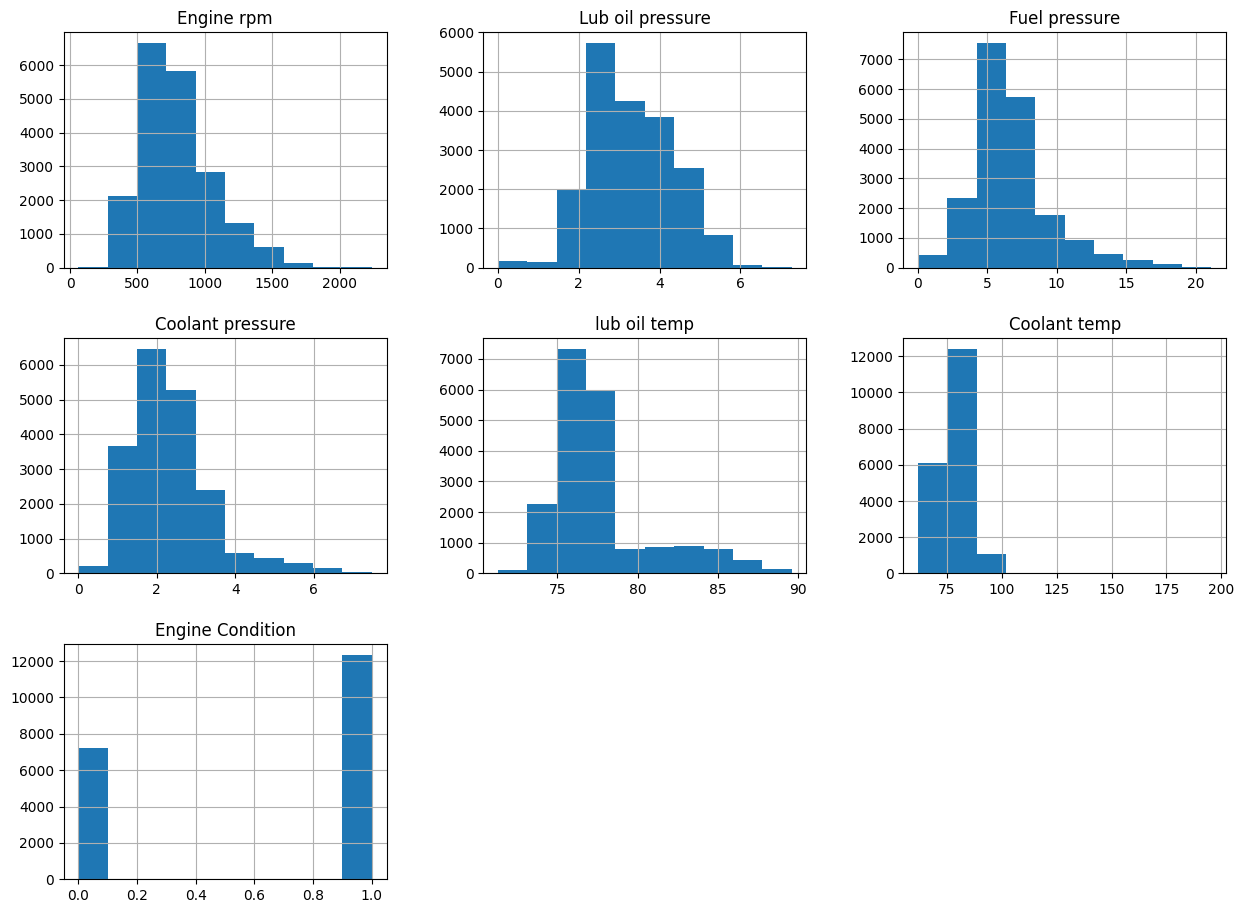

In [ ]:
dgraph = df.select_dtypes(include = ["float","int"])
dgraph.hist(figsize=(15,11))
plt.show()

In [ ]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


Text(0.5, 1.0, 'box plot of Engine rpm')

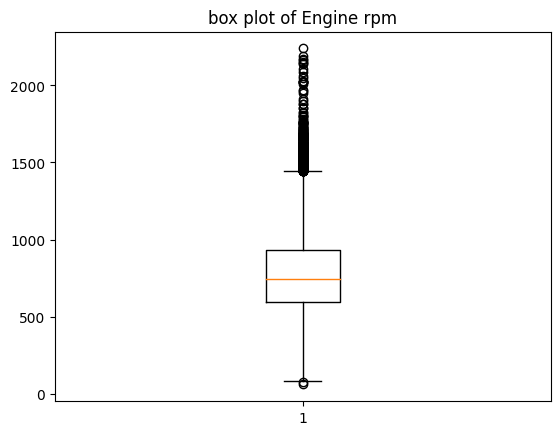

In [ ]:
plt.boxplot(df["Engine rpm"])
plt.title("box plot of Engine rpm")

In [ ]:
q1 = np.percentile(df["Engine rpm"],25, interpolation="midpoint")
q2 = np.percentile(df["Engine rpm"],50, interpolation="midpoint")
q3 = np.percentile(df["Engine rpm"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

593.0
746.0
934.0


<ipython-input-536-a85797ad835a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(df["Engine rpm"],25, interpolation="midpoint")
<ipython-input-536-a85797ad835a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(df["Engine rpm"],50, interpolation="midpoint")
<ipython-input-536-a85797ad835a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

81.5
1445.5


In [ ]:
outlier = []
for x in df["Engine rpm"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[1674,
 1776,
 1481,
 1661,
 1620,
 1694,
 1459,
 1509,
 2143,
 1537,
 1583,
 1521,
 1606,
 1621,
 1499,
 1507,
 1463,
 1877,
 1521,
 1522,
 1448,
 1603,
 1657,
 1450,
 1617,
 1553,
 1529,
 2047,
 1582,
 1565,
 1485,
 1507,
 1480,
 1700,
 1729,
 1447,
 1530,
 1556,
 1613,
 1529,
 1482,
 1500,
 1550,
 2011,
 1597,
 1577,
 77,
 1587,
 1465,
 1585,
 1694,
 1557,
 1480,
 1562,
 1643,
 1448,
 1465,
 1507,
 1494,
 1486,
 1502,
 1512,
 1503,
 1454,
 1524,
 1586,
 1642,
 1580,
 1640,
 1518,
 1502,
 1618,
 1501,
 1582,
 1501,
 1559,
 1552,
 1511,
 1446,
 2239,
 1457,
 1573,
 1683,
 1546,
 1764,
 1628,
 2191,
 1465,
 1453,
 1613,
 1464,
 1515,
 1784,
 1488,
 1492,
 1487,
 1478,
 1653,
 1644,
 1527,
 1527,
 1463,
 1484,
 1609,
 1633,
 1631,
 1764,
 1598,
 1543,
 1516,
 1520,
 1598,
 1485,
 1561,
 1474,
 1571,
 1818,
 1621,
 2061,
 1569,
 1670,
 1510,
 1583,
 1625,
 1673,
 1484,
 1572,
 1458,
 1671,
 1500,
 1447,
 1522,
 1593,
 1470,
 1624,
 1458,
 1498,
 1503,
 2106,
 1458,
 1531,
 1749,
 2024,
 

In [ ]:
ind1 = df["Engine rpm"]>upp_limit
df.loc[ind1].index

Int64Index([   55,    88,   102,   108,   143,   157,   179,   243,   261,
              326,
            ...
            19156, 19158, 19181, 19198, 19208, 19241, 19357, 19409, 19447,
            19466],
           dtype='int64', length=462)

In [ ]:
ind1 = df["Engine rpm"]>upp_limit
z= df.loc[ind1].index
z[:50]

Int64Index([  55,   88,  102,  108,  143,  157,  179,  243,  261,  326,  361,
             435,  467,  476,  478,  540,  542,  610,  632,  745,  806,  824,
             863,  973, 1139, 1213, 1215, 1252, 1257, 1270, 1280, 1337, 1358,
            1505, 1528, 1536, 1649, 1773, 1806, 1859, 1883, 1932, 1969, 1995,
            2035, 2066, 2265, 2333, 2378, 2449],
           dtype='int64')

In [ ]:
df.drop([55, 88,  102,  108,  143,  157,  179,  243,  261,  326,  361, 435,  467,  476,  478,  540,  542,  610,  632,  745,  806,  824,863,  973, 1139, 1213, 1215, 1252, 1257, 1270, 1280, 1337, 1358,
          1505, 1528, 1536, 1649, 1773, 1806, 1859, 1883, 1932, 1969, 1995, 2035, 2066, 2265, 2333, 2378, 2449],inplace=True)

In [ ]:
z[50:100]

Int64Index([2464, 2619, 2718, 2792, 2804, 2819, 2850, 2864, 2909, 2912, 2933,
            2935, 3022, 3084, 3145, 3169, 3184, 3260, 3294, 3335, 3379, 3432,
            3433, 3504, 3515, 3524, 3539, 3571, 3641, 3642, 3690, 3707, 3725,
            3798, 3810, 3837, 3852, 3872, 3878, 3882, 3919, 3948, 3968, 4029,
            4078, 4126, 4127, 4129, 4256, 4273],
           dtype='int64')

In [ ]:
df.drop([2464, 2619, 2718, 2792, 2804, 2819, 2850, 2864, 2909, 2912, 2933,
            2935, 3022, 3084, 3145, 3169, 3184, 3260, 3294, 3335, 3379, 3432,
            3433, 3504, 3515, 3524, 3539, 3571, 3641, 3642, 3690, 3707, 3725,
            3798, 3810, 3837, 3852, 3872, 3878, 3882, 3919, 3948, 3968, 4029,
            4078, 4126, 4127, 4129, 4256, 4273],inplace=True)

In [ ]:
z[100:150]

Int64Index([4297, 4402, 4408, 4429, 4431, 4443, 4484, 4536, 4582, 4682, 4687,
            4695, 4756, 4774, 4827, 4849, 4876, 4887, 4911, 4926, 4945, 4950,
            5033, 5055, 5076, 5108, 5249, 5347, 5362, 5401, 5438, 5477, 5553,
            5602, 5638, 5641, 5677, 5690, 5734, 5824, 5848, 5944, 5972, 6059,
            6079, 6085, 6126, 6194, 6240, 6250],
           dtype='int64')

In [ ]:
df.drop([4297, 4402, 4408, 4429, 4431, 4443, 4484, 4536, 4582, 4682, 4687,
            4695, 4756, 4774, 4827, 4849, 4876, 4887, 4911, 4926, 4945, 4950,
            5033, 5055, 5076, 5108, 5249, 5347, 5362, 5401, 5438, 5477, 5553,
            5602, 5638, 5641, 5677, 5690, 5734, 5824, 5848, 5944, 5972, 6059,
            6079, 6085, 6126, 6194, 6240, 6250],inplace=True)

In [ ]:
z[150:200]

Int64Index([6265, 6310, 6332, 6354, 6401, 6469, 6523, 6533, 6536, 6588, 6694,
            6764, 6767, 6953, 7004, 7015, 7016, 7033, 7091, 7239, 7271, 7289,
            7297, 7317, 7334, 7381, 7403, 7435, 7464, 7467, 7475, 7564, 7688,
            7703, 7777, 7863, 8007, 8012, 8083, 8125, 8168, 8192, 8244, 8262,
            8267, 8353, 8409, 8423, 8485, 8500],
           dtype='int64')

In [ ]:
df.drop([6265, 6310, 6332, 6354, 6401, 6469, 6523, 6533, 6536, 6588, 6694,
            6764, 6767, 6953, 7004, 7015, 7016, 7033, 7091, 7239, 7271, 7289,
            7297, 7317, 7334, 7381, 7403, 7435, 7464, 7467, 7475, 7564, 7688,
            7703, 7777, 7863, 8007, 8012, 8083, 8125, 8168, 8192, 8244, 8262,
            8267, 8353, 8409, 8423, 8485, 8500],inplace=True)

In [ ]:
z[200:250]

Int64Index([ 8560,  8588,  8667,  8682,  8721,  8734,  8755,  8794,  8802,
             8816,  8855,  8888,  8966,  8975,  8993,  9015,  9025,  9123,
             9177,  9206,  9216,  9285,  9288,  9297,  9394,  9398,  9474,
             9479,  9506,  9627,  9647,  9667,  9745,  9864,  9908,  9936,
             9988, 10019, 10038, 10043, 10069, 10092, 10193, 10263, 10367,
            10571, 10587, 10676, 10681, 10705],
           dtype='int64')

In [ ]:
df.drop([8560,  8588,  8667,  8682,  8721,  8734,  8755,  8794,  8802,
             8816,  8855,  8888,  8966,  8975,  8993,  9015,  9025,  9123,
             9177,  9206,  9216,  9285,  9288,  9297,  9394,  9398,  9474,
             9479,  9506,  9627,  9647,  9667,  9745,  9864,  9908,  9936,
             9988, 10019, 10038, 10043, 10069, 10092, 10193, 10263, 10367,
            10571, 10587, 10676, 10681, 10705],inplace=True)

In [ ]:
z[250:300]

Int64Index([10706, 10722, 10738, 10742, 10779, 10817, 10873, 10933, 10965,
            11018, 11029, 11090, 11120, 11124, 11153, 11208, 11224, 11251,
            11306, 11346, 11448, 11521, 11542, 11638, 11656, 11663, 11689,
            11699, 11812, 11829, 11840, 11848, 11874, 11880, 11907, 11983,
            12044, 12142, 12153, 12267, 12354, 12376, 12378, 12516, 12563,
            12581, 12726, 12782, 12859, 12861],
           dtype='int64')

In [ ]:
df.drop([10706, 10722, 10738, 10742, 10779, 10817, 10873, 10933, 10965,
            11018, 11029, 11090, 11120, 11124, 11153, 11208, 11224, 11251,
            11306, 11346, 11448, 11521, 11542, 11638, 11656, 11663, 11689,
            11699, 11812, 11829, 11840, 11848, 11874, 11880, 11907, 11983,
            12044, 12142, 12153, 12267, 12354, 12376, 12378, 12516, 12563,
            12581, 12726, 12782, 12859, 12861],inplace=True)

In [ ]:
z[300:350]

Int64Index([12912, 12922, 12973, 13062, 13213, 13324, 13350, 13472, 13507,
            13512, 13516, 13532, 13536, 13568, 13672, 13704, 13708, 13770,
            13805, 13809, 13829, 13846, 13875, 13948, 14140, 14173, 14200,
            14307, 14318, 14345, 14494, 14546, 14597, 14636, 14654, 14680,
            14682, 14688, 14689, 14761, 14797, 14820, 14915, 14969, 15038,
            15125, 15291, 15323, 15334, 15362],
           dtype='int64')

In [ ]:
df.drop([12912, 12922, 12973, 13062, 13213, 13324, 13350, 13472, 13507,
            13512, 13516, 13532, 13536, 13568, 13672, 13704, 13708, 13770,
            13805, 13809, 13829, 13846, 13875, 13948, 14140, 14173, 14200,
            14307, 14318, 14345, 14494, 14546, 14597, 14636, 14654, 14680,
            14682, 14688, 14689, 14761, 14797, 14820, 14915, 14969, 15038,
            15125, 15291, 15323, 15334, 15362],inplace=True)

In [ ]:
z[350:450]

Int64Index([15373, 15431, 15436, 15477, 15486, 15496, 15597, 15679, 15732,
            15742, 15768, 15779, 15782, 15783, 15822, 15897, 15903, 15905,
            15936, 15962, 16054, 16077, 16093, 16182, 16196, 16352, 16392,
            16414, 16437, 16514, 16530, 16534, 16547, 16548, 16567, 16638,
            16701, 16775, 16777, 16782, 16810, 16872, 16902, 16931, 16954,
            17047, 17057, 17146, 17226, 17291, 17294, 17296, 17364, 17423,
            17483, 17505, 17524, 17550, 17552, 17582, 17646, 17690, 17762,
            17770, 17826, 17881, 17917, 17968, 17972, 18015, 18037, 18051,
            18066, 18141, 18205, 18227, 18239, 18252, 18336, 18469, 18524,
            18538, 18602, 18605, 18607, 18701, 18716, 18721, 18737, 18744,
            18800, 18863, 18870, 18877, 18892, 18922, 18932, 18958, 19000,
            19084],
           dtype='int64')

In [ ]:
df.drop([15373, 15431, 15436, 15477, 15486, 15496, 15597, 15679, 15732,
            15742, 15768, 15779, 15782, 15783, 15822, 15897, 15903, 15905,
            15936, 15962, 16054, 16077, 16093, 16182, 16196, 16352, 16392,
            16414, 16437, 16514, 16530, 16534, 16547, 16548, 16567, 16638,
            16701, 16775, 16777, 16782, 16810, 16872, 16902, 16931, 16954,
            17047, 17057, 17146, 17226, 17291, 17294, 17296, 17364, 17423,
            17483, 17505, 17524, 17550, 17552, 17582, 17646, 17690, 17762,
            17770, 17826, 17881, 17917, 17968, 17972, 18015, 18037, 18051,
            18066, 18141, 18205, 18227, 18239, 18252, 18336, 18469, 18524,
            18538, 18602, 18605, 18607, 18701, 18716, 18721, 18737, 18744,
            18800, 18863, 18870, 18877, 18892, 18922, 18932, 18958, 19000,
            19084],inplace=True)

In [ ]:
z[450:550]

Int64Index([19128, 19152, 19156, 19158, 19181, 19198, 19208, 19241, 19357,
            19409, 19447, 19466],
           dtype='int64')

In [ ]:
df.drop([19128, 19152, 19156, 19158, 19181, 19198, 19208, 19241, 19357,
            19409, 19447, 19466],inplace=True)

In [ ]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [ ]:
ind1 = df["Engine rpm"]<low_limit
df.loc[ind1].index

Int64Index([2262, 13797], dtype='int64')

In [ ]:
df.drop([2262, 13797],inplace=True)

In [ ]:
outlier = []
for x in df["Engine rpm"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of Engine rpm')

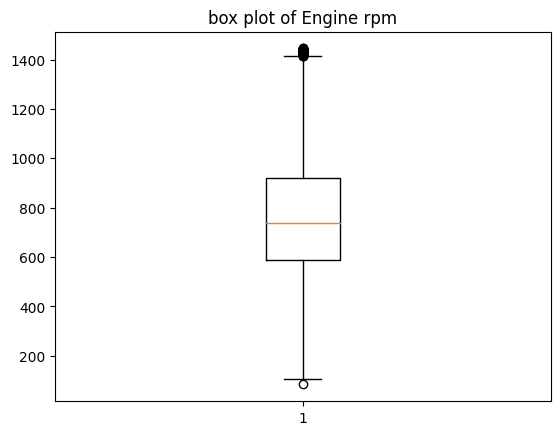

In [ ]:
plt.boxplot(df["Engine rpm"])
plt.title("box plot of Engine rpm")

Text(0.5, 1.0, 'box plot of Lub oil pressure')

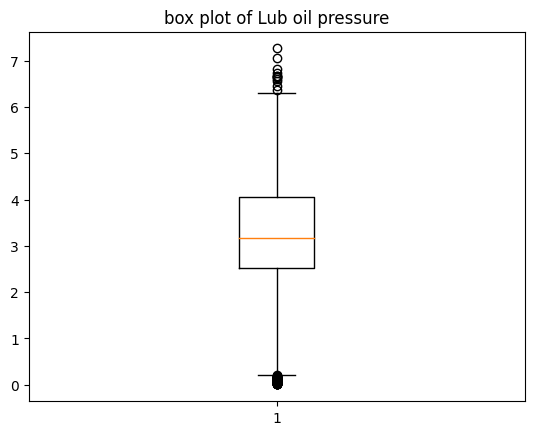

In [ ]:
plt.boxplot(df["Lub oil pressure"])
plt.title("box plot of Lub oil pressure")

In [ ]:
q1 = np.percentile(df["Lub oil pressure"],25, interpolation="midpoint")
q2 = np.percentile(df["Lub oil pressure"],50, interpolation="midpoint")
q3 = np.percentile(df["Lub oil pressure"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

2.5181868439999997
3.160612207
4.054674228


<ipython-input-564-17dacc7d9cd2>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(df["Lub oil pressure"],25, interpolation="midpoint")
<ipython-input-564-17dacc7d9cd2>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(df["Lub oil pressure"],50, interpolation="midpoint")
<ipython-input-564-17dacc7d9cd2>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

0.21345576799999977
6.359405303999999


In [ ]:
outlier = []

for x in df["Lub oil pressure"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[0.143224595,
 6.45811012,
 0.072614682,
 0.158712284,
 7.265565536,
 0.126659536,
 0.027070823,
 0.013605747,
 0.196882284,
 0.052322313,
 0.014064288,
 0.089597014,
 0.01866281,
 0.004213703,
 0.139560158,
 0.130043074,
 0.151722048,
 7.051322299,
 6.560668993,
 0.007891068,
 0.079414876,
 6.643937594,
 0.025207256,
 0.112966164,
 0.058794497,
 0.017448888,
 0.110167271,
 0.036155578,
 0.150336505,
 0.063231139,
 0.062089833,
 0.089814153,
 6.668045652,
 0.054388318,
 0.103614147,
 0.168868564,
 6.615158752,
 0.074388453,
 0.003384113,
 0.158501698,
 0.148360827,
 6.826921011,
 0.197602773,
 0.080562204,
 0.136916593,
 0.12486646,
 0.068751881,
 0.029666923,
 6.729323739,
 0.012157152,
 6.681496913,
 0.02980383,
 0.135279374,
 0.135578338,
 6.364523253,
 0.107738542,
 0.191380316,
 6.659097272,
 0.192245506,
 0.192741064,
 0.139909954,
 0.040510041,
 0.060044018]

In [ ]:
ind1 = df["Lub oil pressure"]>upp_limit
df.loc[ind1].index

Int64Index([440, 655, 3155, 3344, 5700, 8217, 10602, 12482, 15303, 15719,
            16786, 17612],
           dtype='int64')

In [ ]:
df.drop([440, 655, 3155, 3344, 5700, 8217, 10602, 12482, 15303, 15719,
            16786, 17612],inplace=True)

In [ ]:
ind1 = df["Lub oil pressure"]<low_limit
df.loc[ind1].index

Int64Index([  397,   587,   649,   854,  1101,  1117,  1388,  1455,  1569,
             1746,  2144,  2159,  2573,  2855,  2905,  3390,  4228,  5722,
             5778,  5912,  6031,  6418,  6494,  7164,  7207,  7860,  8203,
            10059, 10061, 10122, 10670, 11049, 11427, 11499, 13559, 13855,
            14034, 14467, 14807, 15104, 15542, 15971, 16484, 16589, 17046,
            17079, 17639, 18055, 18206, 18296, 18321],
           dtype='int64')

In [ ]:
df.drop([397,   587,   649,   854,  1101,  1117,  1388,  1455,  1569,
             1746,  2144,  2159,  2573,  2855,  2905,  3390,  4228,  5722,
             5778,  5912,  6031,  6418,  6494,  7164,  7207,  7860,  8203,
            10059, 10061, 10122, 10670, 11049, 11427, 11499, 13559, 13855,
            14034, 14467, 14807, 15104, 15542, 15971, 16484, 16589, 17046,
            17079, 17639, 18055, 18206, 18296, 18321],inplace=True)

In [ ]:
outlier = []

for x in df["Lub oil pressure"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[]

Text(0.5, 1.0, 'box plot of Lub oil pressure')

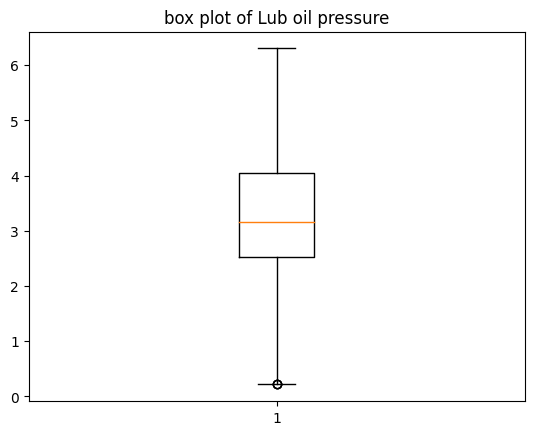

In [ ]:
plt.boxplot(df["Lub oil pressure"])
plt.title("box plot of Lub oil pressure")

In [ ]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

Text(0.5, 1.0, 'box plot of Fuel pressure')

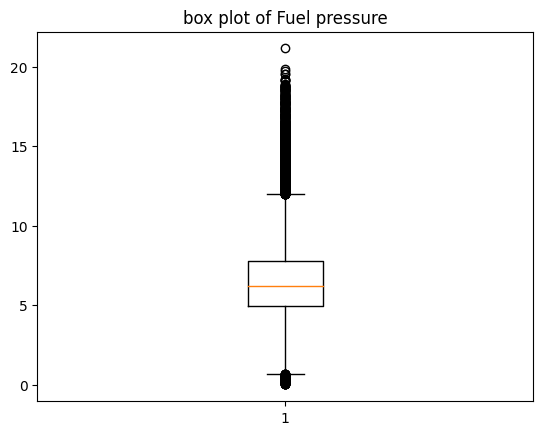

In [ ]:
plt.boxplot(df["Fuel pressure"])
plt.title("box plot of Fuel pressure")

In [ ]:
q1 = np.percentile(df["Fuel pressure"],25, interpolation="midpoint")
q2 = np.percentile(df["Fuel pressure"],50, interpolation="midpoint")
q3 = np.percentile(df["Fuel pressure"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

4.9132484640000005
6.2006177440000005
7.7433369935


<ipython-input-575-e72322586ef0>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(df["Fuel pressure"],25, interpolation="midpoint")
<ipython-input-575-e72322586ef0>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(df["Fuel pressure"],50, interpolation="midpoint")
<ipython-input-575-e72322586ef0>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

0.6681156697500015
11.988469787749999


In [ ]:
outlier = []
for x in df["Fuel pressure"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[16.19386556,
 19.51017166,
 15.73887141,
 13.97116025,
 12.31190941,
 13.7865859,
 17.5689917,
 12.57025147,
 0.314028302,
 13.59343394,
 15.34664402,
 0.435527221,
 12.93603086,
 12.21937836,
 12.08420404,
 16.16594997,
 12.82881802,
 13.96014886,
 13.58341972,
 15.46040695,
 14.47957576,
 13.376654,
 13.27609129,
 13.11044077,
 0.451073145,
 13.13773173,
 12.14284087,
 13.41128319,
 13.76926041,
 0.625999717,
 14.86914018,
 18.41824809,
 12.27024893,
 16.37622331,
 12.29772043,
 17.28967956,
 14.02751381,
 0.095331933,
 13.03311237,
 14.45696642,
 15.83335484,
 15.39334334,
 13.35952521,
 13.35549411,
 17.56316606,
 14.10747176,
 15.31196456,
 14.9511731,
 17.35775318,
 14.19708747,
 12.55669715,
 12.15434602,
 12.60632405,
 14.28297493,
 12.20058012,
 12.54677803,
 15.02987013,
 13.96532201,
 13.86888155,
 12.74429434,
 0.353161674,
 13.81543548,
 12.21998436,
 18.49833096,
 15.98042471,
 12.76721012,
 15.89864405,
 0.360413366,
 13.45282158,
 12.01745784,
 16.2361699,
 13.38409959

In [ ]:
ind1 = df["Fuel pressure"]>upp_limit
a = df.loc[ind1].index
a[:100]

Int64Index([   1,    3,    4,   29,   32,   54,   71,   89,  107,  109,  139,
             174,  176,  203,  205,  288,  315,  322,  346,  347,  390,  391,
             418,  442,  454,  485,  517,  523,  524,  556,  564,  586,  597,
             638,  650,  669,  675,  697,  750,  773,  820,  928,  944,  963,
            1053, 1120, 1122, 1130, 1134, 1168, 1178, 1179, 1214, 1230, 1237,
            1260, 1266, 1285, 1295, 1312, 1328, 1351, 1354, 1375, 1393, 1395,
            1425, 1481, 1494, 1498, 1520, 1544, 1557, 1564, 1588, 1610, 1639,
            1657, 1711, 1770, 1783, 1796, 1831, 1842, 1864, 1889, 1918, 1923,
            1933, 1937, 1946, 1949, 1997, 2004, 2059, 2061, 2143, 2147, 2191,
            2221],
           dtype='int64')

In [ ]:
df.drop([ 1,    3,    4,   29,   32,   54,   71,   89,  107,  109,  139,
             174,  176,  203,  205,  288,  315,  322,  346,  347,  390,  391,
             418,  442,  454,  485,  517,  523,  524,  556,  564,  586,  597,
             638,  650,  669,  675,  697,  750,  773,  820,  928,  944,  963,
            1053, 1120, 1122, 1130, 1134, 1168, 1178, 1179, 1214, 1230, 1237,
            1260, 1266, 1285, 1295, 1312, 1328, 1351, 1354, 1375, 1393, 1395,
            1425, 1481, 1494, 1498, 1520, 1544, 1557, 1564, 1588, 1610, 1639,
            1657, 1711, 1770, 1783, 1796, 1831, 1842, 1864, 1889, 1918, 1923,
            1933, 1937, 1946, 1949, 1997, 2004, 2059, 2061, 2143, 2147, 2191,
            222],inplace=True)

In [ ]:
a[100:200]

Int64Index([2223, 2238, 2240, 2249, 2268, 2283, 2310, 2312, 2330, 2342, 2357,
            2373, 2397, 2411, 2442, 2480, 2482, 2507, 2546, 2555, 2594, 2598,
            2606, 2608, 2614, 2631, 2636, 2642, 2647, 2655, 2680, 2684, 2694,
            2704, 2752, 2772, 2845, 2846, 2877, 2882, 2889, 2894, 2901, 2911,
            2928, 2965, 2982, 3096, 3103, 3111, 3144, 3182, 3221, 3223, 3241,
            3256, 3316, 3317, 3331, 3349, 3360, 3369, 3414, 3416, 3427, 3446,
            3454, 3467, 3493, 3543, 3551, 3563, 3686, 3730, 3738, 3739, 3761,
            3767, 3784, 3847, 3855, 3868, 3885, 3900, 3925, 3941, 3951, 3954,
            3974, 4036, 4043, 4059, 4086, 4089, 4097, 4133, 4134, 4185, 4186,
            4197],
           dtype='int64')

In [ ]:
df.drop([ 2223, 2238, 2240, 2249, 2268, 2283, 2310, 2312, 2330, 2342, 2357,
            2373, 2397, 2411, 2442, 2480, 2482, 2507, 2546, 2555, 2594, 2598,
            2606, 2608, 2614, 2631, 2636, 2642, 2647, 2655, 2680, 2684, 2694,
            2704, 2752, 2772, 2845, 2846, 2877, 2882, 2889, 2894, 2901, 2911,
            2928, 2965, 2982, 3096, 3103, 3111, 3144, 3182, 3221, 3223, 3241,
            3256, 3316, 3317, 3331, 3349, 3360, 3369, 3414, 3416, 3427, 3446,
            3454, 3467, 3493, 3543, 3551, 3563, 3686, 3730, 3738, 3739, 3761,
            3767, 3784, 3847, 3855, 3868, 3885, 3900, 3925, 3941, 3951, 3954,
            3974, 4036, 4043, 4059, 4086, 4089, 4097, 4133, 4134, 4185, 4186,
            4197],inplace=True)

In [ ]:
a[200:300]

Int64Index([4223, 4232, 4246, 4253, 4279, 4296, 4305, 4317, 4340, 4348, 4352,
            4384, 4385, 4392, 4409, 4430, 4455, 4485, 4498, 4509, 4511, 4551,
            4554, 4576, 4594, 4611, 4614, 4615, 4628, 4638, 4643, 4686, 4718,
            4720, 4743, 4744, 4750, 4766, 4794, 4811, 4881, 4933, 4961, 4970,
            4975, 4986, 5007, 5019, 5044, 5068, 5084, 5131, 5234, 5264, 5268,
            5287, 5289, 5336, 5337, 5351, 5372, 5378, 5423, 5427, 5447, 5449,
            5459, 5535, 5538, 5543, 5562, 5610, 5615, 5630, 5652, 5666, 5693,
            5736, 5747, 5749, 5750, 5761, 5764, 5770, 5810, 5858, 5873, 5905,
            5911, 5923, 5926, 5931, 5936, 5969, 6006, 6124, 6136, 6167, 6171,
            6201],
           dtype='int64')

In [ ]:
df.drop([4223, 4232, 4246, 4253, 4279, 4296, 4305, 4317, 4340, 4348, 4352,
            4384, 4385, 4392, 4409, 4430, 4455, 4485, 4498, 4509, 4511, 4551,
            4554, 4576, 4594, 4611, 4614, 4615, 4628, 4638, 4643, 4686, 4718,
            4720, 4743, 4744, 4750, 4766, 4794, 4811, 4881, 4933, 4961, 4970,
            4975, 4986, 5007, 5019, 5044, 5068, 5084, 5131, 5234, 5264, 5268,
            5287, 5289, 5336, 5337, 5351, 5372, 5378, 5423, 5427, 5447, 5449,
            5459, 5535, 5538, 5543, 5562, 5610, 5615, 5630, 5652, 5666, 5693,
            5736, 5747, 5749, 5750, 5761, 5764, 5770, 5810, 5858, 5873, 5905,
            5911, 5923, 5926, 5931, 5936, 5969, 6006, 6124, 6136, 6167, 6171,
            6201],inplace=True)

In [ ]:
a[300:400]

Int64Index([6228, 6233, 6234, 6242, 6249, 6253, 6301, 6342, 6409, 6428, 6468,
            6482, 6557, 6582, 6596, 6607, 6618, 6641, 6658, 6714, 6719, 6731,
            6746, 6749, 6763, 6776, 6794, 6801, 6806, 6826, 6866, 6878, 6908,
            6911, 6914, 6941, 6977, 7038, 7052, 7067, 7102, 7106, 7128, 7130,
            7139, 7141, 7146, 7173, 7187, 7189, 7206, 7210, 7255, 7319, 7324,
            7360, 7406, 7408, 7414, 7426, 7427, 7433, 7448, 7462, 7463, 7472,
            7497, 7500, 7514, 7515, 7560, 7576, 7606, 7612, 7624, 7661, 7669,
            7710, 7716, 7747, 7799, 7804, 7810, 7834, 7840, 7855, 7868, 7877,
            7951, 8003, 8085, 8086, 8088, 8101, 8151, 8153, 8163, 8181, 8189,
            8196],
           dtype='int64')

In [ ]:
df.drop([6228, 6233, 6234, 6242, 6249, 6253, 6301, 6342, 6409, 6428, 6468,
            6482, 6557, 6582, 6596, 6607, 6618, 6641, 6658, 6714, 6719, 6731,
            6746, 6749, 6763, 6776, 6794, 6801, 6806, 6826, 6866, 6878, 6908,
            6911, 6914, 6941, 6977, 7038, 7052, 7067, 7102, 7106, 7128, 7130,
            7139, 7141, 7146, 7173, 7187, 7189, 7206, 7210, 7255, 7319, 7324,
            7360, 7406, 7408, 7414, 7426, 7427, 7433, 7448, 7462, 7463, 7472,
            7497, 7500, 7514, 7515, 7560, 7576, 7606, 7612, 7624, 7661, 7669,
            7710, 7716, 7747, 7799, 7804, 7810, 7834, 7840, 7855, 7868, 7877,
            7951, 8003, 8085, 8086, 8088, 8101, 8151, 8153, 8163, 8181, 8189,
            8196],inplace=True)

In [ ]:
a[400:500]

Int64Index([ 8216,  8260,  8261,  8263,  8277,  8281,  8283,  8308,  8311,
             8358,  8477,  8496,  8509,  8520,  8525,  8529,  8536,  8540,
             8578,  8595,  8654,  8674,  8715,  8719,  8720,  8736,  8743,
             8750,  8766,  8817,  8828,  8829,  8835,  8864,  8886,  8958,
             8968,  8973,  8977,  8983,  9007,  9009,  9021,  9084,  9114,
             9140,  9211,  9221,  9226,  9250,  9274,  9307,  9329,  9333,
             9340,  9354,  9362,  9372,  9411,  9414,  9468,  9472,  9513,
             9527,  9529,  9556,  9558,  9562,  9574,  9607,  9637,  9645,
             9665,  9669,  9684,  9685,  9691,  9713,  9725,  9735,  9740,
             9743,  9755,  9770,  9773,  9775,  9801,  9802,  9810,  9814,
             9837,  9845,  9858,  9949,  9972,  9984, 10006, 10020, 10032,
            10053],
           dtype='int64')

In [ ]:
df.drop([8216,  8260,  8261,  8263,  8277,  8281,  8283,  8308,  8311,
             8358,  8477,  8496,  8509,  8520,  8525,  8529,  8536,  8540,
             8578,  8595,  8654,  8674,  8715,  8719,  8720,  8736,  8743,
             8750,  8766,  8817,  8828,  8829,  8835,  8864,  8886,  8958,
             8968,  8973,  8977,  8983,  9007,  9009,  9021,  9084,  9114,
             9140,  9211,  9221,  9226,  9250,  9274,  9307,  9329,  9333,
             9340,  9354,  9362,  9372,  9411,  9414,  9468,  9472,  9513,
             9527,  9529,  9556,  9558,  9562,  9574,  9607,  9637,  9645,
             9665,  9669,  9684,  9685,  9691,  9713,  9725,  9735,  9740,
             9743,  9755,  9770,  9773,  9775,  9801,  9802,  9810,  9814,
             9837,  9845,  9858,  9949,  9972,  9984, 10006, 10020, 10032,
            10053],inplace=True)

In [ ]:
a[500:600]

Int64Index([10056, 10074, 10077, 10108, 10119, 10130, 10136, 10147, 10161,
            10167, 10186, 10201, 10244, 10292, 10311, 10332, 10340, 10343,
            10356, 10357, 10359, 10361, 10424, 10426, 10437, 10440, 10484,
            10489, 10491, 10493, 10494, 10504, 10544, 10545, 10582, 10588,
            10620, 10629, 10651, 10652, 10660, 10668, 10698, 10700, 10702,
            10709, 10710, 10723, 10739, 10753, 10755, 10774, 10781, 10824,
            10830, 10888, 10905, 10951, 10952, 10958, 10972, 10990, 11014,
            11060, 11067, 11093, 11095, 11117, 11158, 11161, 11247, 11263,
            11279, 11285, 11293, 11301, 11313, 11332, 11333, 11361, 11370,
            11385, 11389, 11437, 11454, 11487, 11500, 11512, 11526, 11539,
            11545, 11555, 11560, 11577, 11593, 11606, 11609, 11616, 11632,
            11651],
           dtype='int64')

In [ ]:
df.drop([10056, 10074, 10077, 10108, 10119, 10130, 10136, 10147, 10161,
            10167, 10186, 10201, 10244, 10292, 10311, 10332, 10340, 10343,
            10356, 10357, 10359, 10361, 10424, 10426, 10437, 10440, 10484,
            10489, 10491, 10493, 10494, 10504, 10544, 10545, 10582, 10588,
            10620, 10629, 10651, 10652, 10660, 10668, 10698, 10700, 10702,
            10709, 10710, 10723, 10739, 10753, 10755, 10774, 10781, 10824,
            10830, 10888, 10905, 10951, 10952, 10958, 10972, 10990, 11014,
            11060, 11067, 11093, 11095, 11117, 11158, 11161, 11247, 11263,
            11279, 11285, 11293, 11301, 11313, 11332, 11333, 11361, 11370,
            11385, 11389, 11437, 11454, 11487, 11500, 11512, 11526, 11539,
            11545, 11555, 11560, 11577, 11593, 11606, 11609, 11616, 11632,
            11651],inplace=True)

In [ ]:
a[600:700]

Int64Index([11674, 11680, 11696, 11710, 11752, 11770, 11777, 11780, 11782,
            11811, 11821, 11841, 11852, 11857, 11872, 11911, 11917, 11919,
            11955, 11957, 11972, 11984, 11988, 12008, 12023, 12067, 12076,
            12086, 12109, 12117, 12127, 12134, 12138, 12141, 12163, 12193,
            12211, 12219, 12246, 12249, 12257, 12319, 12322, 12331, 12332,
            12337, 12348, 12368, 12380, 12394, 12406, 12411, 12426, 12459,
            12462, 12532, 12534, 12550, 12554, 12560, 12574, 12590, 12597,
            12598, 12602, 12683, 12688, 12700, 12723, 12727, 12743, 12774,
            12789, 12790, 12834, 12840, 12868, 12906, 12919, 12925, 12935,
            12964, 12994, 13050, 13054, 13075, 13077, 13079, 13089, 13133,
            13171, 13177, 13215, 13234, 13236, 13252, 13256, 13284, 13290,
            13302],
           dtype='int64')

In [ ]:
df.drop([11674, 11680, 11696, 11710, 11752, 11770, 11777, 11780, 11782,
            11811, 11821, 11841, 11852, 11857, 11872, 11911, 11917, 11919,
            11955, 11957, 11972, 11984, 11988, 12008, 12023, 12067, 12076,
            12086, 12109, 12117, 12127, 12134, 12138, 12141, 12163, 12193,
            12211, 12219, 12246, 12249, 12257, 12319, 12322, 12331, 12332,
            12337, 12348, 12368, 12380, 12394, 12406, 12411, 12426, 12459,
            12462, 12532, 12534, 12550, 12554, 12560, 12574, 12590, 12597,
            12598, 12602, 12683, 12688, 12700, 12723, 12727, 12743, 12774,
            12789, 12790, 12834, 12840, 12868, 12906, 12919, 12925, 12935,
            12964, 12994, 13050, 13054, 13075, 13077, 13079, 13089, 13133,
            13171, 13177, 13215, 13234, 13236, 13252, 13256, 13284, 13290,
            13302],inplace=True)

In [ ]:
a[700:800]

Int64Index([13305, 13341, 13346, 13361, 13445, 13464, 13475, 13484, 13486,
            13494, 13496, 13552, 13560, 13569, 13574, 13585, 13614, 13628,
            13657, 13713, 13716, 13771, 13780, 13790, 13819, 13824, 13837,
            13845, 13873, 13921, 13930, 13939, 13940, 13943, 13958, 13978,
            13986, 14006, 14033, 14039, 14042, 14058, 14064, 14065, 14111,
            14114, 14117, 14118, 14126, 14136, 14137, 14144, 14152, 14154,
            14190, 14205, 14231, 14245, 14259, 14261, 14271, 14282, 14362,
            14395, 14417, 14441, 14474, 14553, 14558, 14580, 14640, 14643,
            14645, 14668, 14685, 14694, 14702, 14704, 14705, 14740, 14793,
            14815, 14832, 14835, 14838, 14839, 14847, 14884, 14896, 14932,
            14948, 14971, 14998, 15043, 15059, 15068, 15070, 15080, 15090,
            15093],
           dtype='int64')

In [ ]:
df.drop([13305, 13341, 13346, 13361, 13445, 13464, 13475, 13484, 13486,
            13494, 13496, 13552, 13560, 13569, 13574, 13585, 13614, 13628,
            13657, 13713, 13716, 13771, 13780, 13790, 13819, 13824, 13837,
            13845, 13873, 13921, 13930, 13939, 13940, 13943, 13958, 13978,
            13986, 14006, 14033, 14039, 14042, 14058, 14064, 14065, 14111,
            14114, 14117, 14118, 14126, 14136, 14137, 14144, 14152, 14154,
            14190, 14205, 14231, 14245, 14259, 14261, 14271, 14282, 14362,
            14395, 14417, 14441, 14474, 14553, 14558, 14580, 14640, 14643,
            14645, 14668, 14685, 14694, 14702, 14704, 14705, 14740, 14793,
            14815, 14832, 14835, 14838, 14839, 14847, 14884, 14896, 14932,
            14948, 14971, 14998, 15043, 15059, 15068, 15070, 15080, 15090,
            15093],inplace=True)

In [ ]:
a[800:900]

Int64Index([15101, 15102, 15118, 15134, 15135, 15177, 15224, 15248, 15257,
            15275, 15297, 15305, 15319, 15335, 15377, 15394, 15407, 15438,
            15447, 15501, 15505, 15528, 15581, 15584, 15627, 15637, 15684,
            15706, 15724, 15726, 15761, 15767, 15770, 15772, 15820, 15835,
            15853, 15890, 15912, 15913, 15919, 15922, 15947, 15951, 15960,
            15974, 16030, 16031, 16071, 16073, 16100, 16105, 16109, 16128,
            16129, 16132, 16158, 16159, 16165, 16175, 16200, 16201, 16206,
            16209, 16255, 16256, 16262, 16275, 16288, 16304, 16329, 16330,
            16391, 16451, 16460, 16497, 16498, 16511, 16524, 16532, 16537,
            16559, 16626, 16627, 16642, 16649, 16669, 16671, 16680, 16681,
            16693, 16697, 16706, 16715, 16719, 16722, 16724, 16731, 16773,
            16798],
           dtype='int64')

In [ ]:
df.drop([15101, 15102, 15118, 15134, 15135, 15177, 15224, 15248, 15257,
            15275, 15297, 15305, 15319, 15335, 15377, 15394, 15407, 15438,
            15447, 15501, 15505, 15528, 15581, 15584, 15627, 15637, 15684,
            15706, 15724, 15726, 15761, 15767, 15770, 15772, 15820, 15835,
            15853, 15890, 15912, 15913, 15919, 15922, 15947, 15951, 15960,
            15974, 16030, 16031, 16071, 16073, 16100, 16105, 16109, 16128,
            16129, 16132, 16158, 16159, 16165, 16175, 16200, 16201, 16206,
            16209, 16255, 16256, 16262, 16275, 16288, 16304, 16329, 16330,
            16391, 16451, 16460, 16497, 16498, 16511, 16524, 16532, 16537,
            16559, 16626, 16627, 16642, 16649, 16669, 16671, 16680, 16681,
            16693, 16697, 16706, 16715, 16719, 16722, 16724, 16731, 16773,
            16798],inplace=True)

In [ ]:
a[900:1000]

Int64Index([16826, 16849, 16858, 16875, 16891, 16923, 16959, 16974, 17011,
            17019, 17022, 17061, 17083, 17091, 17114, 17126, 17131, 17177,
            17184, 17186, 17192, 17193, 17210, 17216, 17240, 17246, 17265,
            17335, 17351, 17353, 17368, 17396, 17407, 17408, 17414, 17459,
            17471, 17521, 17556, 17576, 17631, 17635, 17641, 17643, 17680,
            17681, 17691, 17725, 17726, 17741, 17747, 17766, 17774, 17776,
            17842, 17847, 17851, 17876, 17901, 17907, 17945, 17965, 17997,
            18006, 18017, 18100, 18142, 18152, 18174, 18180, 18189, 18200,
            18203, 18213, 18221, 18234, 18246, 18259, 18264, 18265, 18268,
            18274, 18323, 18350, 18358, 18387, 18421, 18436, 18483, 18496,
            18501, 18595, 18623, 18637, 18647, 18657, 18676, 18684, 18702,
            18707],
           dtype='int64')

In [ ]:
df.drop([16826, 16849, 16858, 16875, 16891, 16923, 16959, 16974, 17011,
            17019, 17022, 17061, 17083, 17091, 17114, 17126, 17131, 17177,
            17184, 17186, 17192, 17193, 17210, 17216, 17240, 17246, 17265,
            17335, 17351, 17353, 17368, 17396, 17407, 17408, 17414, 17459,
            17471, 17521, 17556, 17576, 17631, 17635, 17641, 17643, 17680,
            17681, 17691, 17725, 17726, 17741, 17747, 17766, 17774, 17776,
            17842, 17847, 17851, 17876, 17901, 17907, 17945, 17965, 17997,
            18006, 18017, 18100, 18142, 18152, 18174, 18180, 18189, 18200,
            18203, 18213, 18221, 18234, 18246, 18259, 18264, 18265, 18268,
            18274, 18323, 18350, 18358, 18387, 18421, 18436, 18483, 18496,
            18501, 18595, 18623, 18637, 18647, 18657, 18676, 18684, 18702,
            18707],inplace=True)

In [ ]:
a[1000:1100]

Int64Index([18739, 18807, 18869, 18871, 18873, 18896, 18964, 18995, 19007,
            19011, 19024, 19032, 19047, 19050, 19062, 19070, 19071, 19106,
            19114, 19132, 19154, 19191, 19204, 19205, 19232, 19237, 19275,
            19278, 19280, 19286, 19296, 19321, 19338, 19351, 19387, 19425,
            19474, 19515, 19524],
           dtype='int64')

In [ ]:
df.drop([18739, 18807, 18869, 18871, 18873, 18896, 18964, 18995, 19007,
            19011, 19024, 19032, 19047, 19050, 19062, 19070, 19071, 19106,
            19114, 19132, 19154, 19191, 19204, 19205, 19232, 19237, 19275,
            19278, 19280, 19286, 19296, 19321, 19338, 19351, 19387, 19425,
            19474, 19515, 19524],inplace=True)

In [ ]:
ind1 = df["Fuel pressure"]<low_limit
df.loc[ind1].index

Int64Index([   91,   134,   408,   514,   618,  1256,  1349,  2232,  2412,
             2747,  2753,  2793,  2873,  3421,  4358,  4716,  5373,  5777,
             5897,  5983,  6259,  6261,  6359,  7423,  7991,  8482,  9129,
             9298,  9578,  9698,  9835, 10304, 10685, 10766, 11541, 11896,
            12108, 12327, 13344, 13400, 14148, 14180, 14380, 14394, 14766,
            15251, 15375, 15378, 16002, 16234, 16467, 16837, 16927, 17273,
            17349, 17377, 17413, 17673, 17888, 18173, 18316, 18434, 18793,
            19116],
           dtype='int64')

In [ ]:
df.drop([91,   134,   408,   514,   618,  1256,  1349,  2232,  2412,
             2747,  2753,  2793,  2873,  3421,  4358,  4716,  5373,  5777,
             5897,  5983,  6259,  6261,  6359,  7423,  7991,  8482,  9129,
             9298,  9578,  9698,  9835, 10304, 10685, 10766, 11541, 11896,
            12108, 12327, 13344, 13400, 14148, 14180, 14380, 14394, 14766,
            15251, 15375, 15378, 16002, 16234, 16467, 16837, 16927, 17273,
            17349, 17377, 17413, 17673, 17888, 18173, 18316, 18434, 18793,
            19116],inplace=True)

In [ ]:
outlier = []
for x in df["Fuel pressure"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[14.3580229]

In [ ]:
ind1 = df["Fuel pressure"]>upp_limit
df.loc[ind1].index

Int64Index([2221], dtype='int64')

In [ ]:
df.drop([2221],inplace=True)

Text(0.5, 1.0, 'box plot of Fuel pressure')

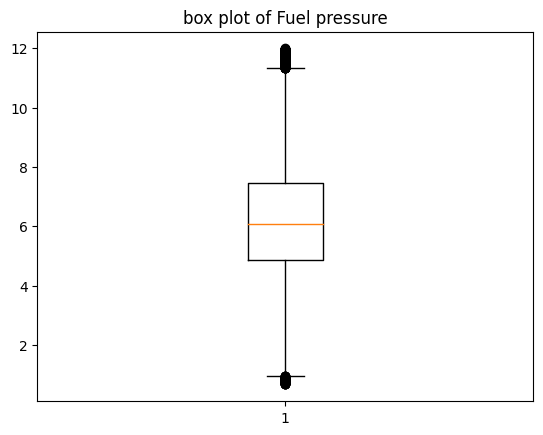

In [ ]:
plt.boxplot(df["Fuel pressure"])
plt.title("box plot of Fuel pressure")

In [ ]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

Text(0.5, 1.0, 'box plot of Coolant pressure')

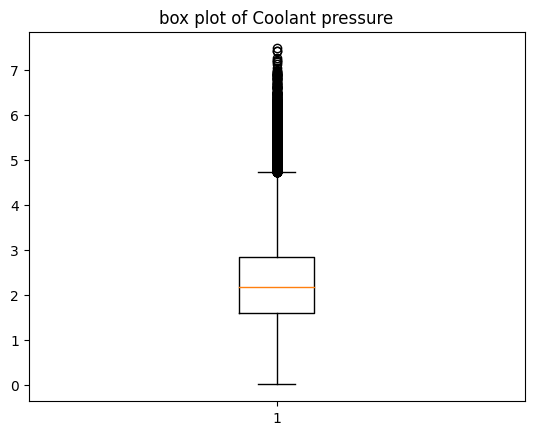

In [ ]:
plt.boxplot(df["Coolant pressure"])
plt.title("box plot of Coolant pressure")

In [ ]:
q1 = np.percentile(df["Coolant pressure"],25, interpolation="midpoint")
q2 = np.percentile(df["Coolant pressure"],50, interpolation="midpoint")
q3 = np.percentile(df["Coolant pressure"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

1.6018402114999999
2.1688326525
2.849897874


<ipython-input-608-bca8b08aa5e8>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(df["Coolant pressure"],25, interpolation="midpoint")
<ipython-input-608-bca8b08aa5e8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(df["Coolant pressure"],50, interpolation="midpoint")
<ipython-input-608-bca8b08aa5e8>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-0.27024628225
4.72198436775


In [ ]:
outlier = []
for x in df["Coolant pressure"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[5.694339313,
 5.261251561,
 4.853973435,
 6.151323455,
 4.868988253,
 4.914337108,
 4.932171294,
 7.478504946,
 5.385198222,
 4.854586184,
 5.052523359,
 5.517483928,
 6.826048275,
 5.278919322,
 5.316528725,
 5.06761218,
 5.87926585,
 5.041899251,
 6.079396982,
 4.932579465,
 5.631606049,
 5.329610078,
 5.489421799,
 5.196123214,
 4.881209356,
 5.913649852,
 6.881109842,
 5.546644433,
 5.053307467,
 6.685426485,
 5.693132234,
 5.114797802,
 4.786943692,
 5.413904346,
 5.069119879,
 4.928431815,
 5.147237485,
 6.1356653,
 4.943831616,
 5.17089953,
 5.721613058,
 5.788750354,
 4.790147221,
 4.975580106,
 4.755667672,
 4.723807519,
 6.862837226,
 6.799183687,
 6.941848959,
 5.097519628,
 5.831570426,
 5.417988024,
 5.375786128,
 5.683282203,
 5.931952727,
 6.887402443,
 5.719245604,
 6.455491675,
 5.339579337,
 5.338218166,
 6.221044624,
 6.672586713,
 5.723238833,
 5.806624338,
 5.145475379,
 4.882687782,
 4.723905697,
 6.222426352,
 5.331036044,
 5.192165506,
 5.369473629,
 5.85581923

In [ ]:
ind1 = df["Coolant pressure"]>upp_limit
b = df.loc[ind1].index
b

Int64Index([   53,    70,    80,   188,   194,   210,   237,   272,   289,
              363,
            ...
            19386, 19392, 19395, 19423, 19455, 19460, 19506, 19517, 19519,
            19531],
           dtype='int64', length=721)

In [ ]:
b[:100]

Int64Index([  53,   70,   80,  188,  194,  210,  237,  272,  289,  363,  388,
             392,  527,  565,  640,  703,  723,  735,  776,  794,  815,  826,
             842,  925,  949,  956,  976,  987,  996, 1002, 1042, 1075, 1076,
            1150, 1153, 1173, 1194, 1202, 1208, 1224, 1238, 1290, 1294, 1309,
            1326, 1340, 1342, 1431, 1442, 1469, 1478, 1479, 1518, 1521, 1535,
            1537, 1551, 1570, 1598, 1640, 1645, 1647, 1661, 1672, 1686, 1716,
            1752, 1778, 1830, 1832, 1846, 1863, 1906, 1939, 1941, 1985, 1988,
            2023, 2090, 2186, 2216, 2233, 2246, 2309, 2344, 2348, 2382, 2390,
            2459, 2474, 2500, 2502, 2544, 2549, 2557, 2610, 2625, 2628, 2640,
            2676],
           dtype='int64')

In [ ]:
df.drop([53,   70,   80,  188,  194,  210,  237,  272,  289,  363,  388,
             392,  527,  565,  640,  703,  723,  735,  776,  794,  815,  826,
             842,  925,  949,  956,  976,  987,  996, 1002, 1042, 1075, 1076,
            1150, 1153, 1173, 1194, 1202, 1208, 1224, 1238, 1290, 1294, 1309,
            1326, 1340, 1342, 1431, 1442, 1469, 1478, 1479, 1518, 1521, 1535,
            1537, 1551, 1570, 1598, 1640, 1645, 1647, 1661, 1672, 1686, 1716,
            1752, 1778, 1830, 1832, 1846, 1863, 1906, 1939, 1941, 1985, 1988,
            2023, 2090, 2186, 2216, 2233, 2246, 2309, 2344, 2348, 2382, 2390,
            2459, 2474, 2500, 2502, 2544, 2549, 2557, 2610, 2625, 2628, 2640,
            2676],inplace=True)

In [ ]:
b[100:200]

Int64Index([2719, 2731, 2780, 2801, 2880, 2910, 2931, 2968, 3024, 3101, 3129,
            3132, 3134, 3143, 3188, 3347, 3361, 3428, 3437, 3484, 3512, 3531,
            3532, 3547, 3607, 3649, 3691, 3695, 3717, 3720, 3723, 3751, 3763,
            3777, 3829, 3850, 3881, 3893, 3985, 3997, 4008, 4017, 4022, 4044,
            4082, 4121, 4173, 4175, 4179, 4187, 4239, 4249, 4269, 4300, 4322,
            4324, 4325, 4334, 4338, 4446, 4456, 4467, 4494, 4505, 4517, 4557,
            4619, 4620, 4633, 4648, 4649, 4657, 4665, 4703, 4705, 4719, 4819,
            4841, 4856, 4874, 4930, 4937, 4964, 4973, 4992, 5001, 5024, 5040,
            5101, 5107, 5130, 5133, 5151, 5193, 5226, 5229, 5242, 5252, 5258,
            5276],
           dtype='int64')

In [ ]:
df.drop([2719, 2731, 2780, 2801, 2880, 2910, 2931, 2968, 3024, 3101, 3129,
            3132, 3134, 3143, 3188, 3347, 3361, 3428, 3437, 3484, 3512, 3531,
            3532, 3547, 3607, 3649, 3691, 3695, 3717, 3720, 3723, 3751, 3763,
            3777, 3829, 3850, 3881, 3893, 3985, 3997, 4008, 4017, 4022, 4044,
            4082, 4121, 4173, 4175, 4179, 4187, 4239, 4249, 4269, 4300, 4322,
            4324, 4325, 4334, 4338, 4446, 4456, 4467, 4494, 4505, 4517, 4557,
            4619, 4620, 4633, 4648, 4649, 4657, 4665, 4703, 4705, 4719, 4819,
            4841, 4856, 4874, 4930, 4937, 4964, 4973, 4992, 5001, 5024, 5040,
            5101, 5107, 5130, 5133, 5151, 5193, 5226, 5229, 5242, 5252, 5258,
            5276],inplace=True)

In [ ]:
b[200:300]

Int64Index([5279, 5280, 5281, 5296, 5380, 5382, 5390, 5425, 5443, 5460, 5502,
            5531, 5532, 5558, 5577, 5596, 5604, 5658, 5661, 5671, 5673, 5679,
            5760, 5775, 5801, 5808, 5827, 5830, 5841, 5943, 5952, 5994, 6000,
            6038, 6046, 6133, 6158, 6160, 6185, 6187, 6202, 6208, 6243, 6246,
            6285, 6343, 6376, 6395, 6411, 6448, 6504, 6537, 6604, 6614, 6698,
            6716, 6744, 6769, 6800, 6805, 6816, 6839, 6844, 6849, 6852, 6869,
            6958, 7005, 7051, 7100, 7155, 7160, 7176, 7180, 7182, 7196, 7224,
            7260, 7269, 7274, 7309, 7322, 7333, 7362, 7363, 7383, 7431, 7489,
            7581, 7592, 7622, 7653, 7709, 7784, 7793, 7820, 7827, 7929, 7936,
            7940],
           dtype='int64')

In [ ]:
df.drop([5279, 5280, 5281, 5296, 5380, 5382, 5390, 5425, 5443, 5460, 5502,
            5531, 5532, 5558, 5577, 5596, 5604, 5658, 5661, 5671, 5673, 5679,
            5760, 5775, 5801, 5808, 5827, 5830, 5841, 5943, 5952, 5994, 6000,
            6038, 6046, 6133, 6158, 6160, 6185, 6187, 6202, 6208, 6243, 6246,
            6285, 6343, 6376, 6395, 6411, 6448, 6504, 6537, 6604, 6614, 6698,
            6716, 6744, 6769, 6800, 6805, 6816, 6839, 6844, 6849, 6852, 6869,
            6958, 7005, 7051, 7100, 7155, 7160, 7176, 7180, 7182, 7196, 7224,
            7260, 7269, 7274, 7309, 7322, 7333, 7362, 7363, 7383, 7431, 7489,
            7581, 7592, 7622, 7653, 7709, 7784, 7793, 7820, 7827, 7929, 7936,
            7940],inplace=True)

In [ ]:
b[300:400]

Int64Index([ 7950,  7984,  7990,  8032,  8097,  8152,  8173,  8199,  8229,
             8236,  8249,  8374,  8436,  8476,  8530,  8593,  8632,  8643,
             8646,  8662,  8704,  8803,  8821,  8891,  8951,  8986,  9026,
             9055,  9068,  9070,  9091,  9117,  9170,  9184,  9193,  9208,
             9243,  9267,  9284,  9290,  9299,  9300,  9305,  9385,  9405,
             9427,  9452,  9475,  9477,  9483,  9508,  9531,  9592,  9599,
             9634,  9673,  9679,  9714,  9729,  9777,  9790,  9827,  9859,
             9869,  9931,  9945,  9958,  9981, 10118, 10221, 10233, 10240,
            10246, 10253, 10254, 10300, 10329, 10349, 10358, 10373, 10377,
            10400, 10420, 10443, 10449, 10496, 10564, 10576, 10577, 10594,
            10598, 10624, 10657, 10666, 10691, 10707, 10711, 10715, 10716,
            10762],
           dtype='int64')

In [ ]:
df.drop([ 7950,  7984,  7990,  8032,  8097,  8152,  8173,  8199,  8229,
             8236,  8249,  8374,  8436,  8476,  8530,  8593,  8632,  8643,
             8646,  8662,  8704,  8803,  8821,  8891,  8951,  8986,  9026,
             9055,  9068,  9070,  9091,  9117,  9170,  9184,  9193,  9208,
             9243,  9267,  9284,  9290,  9299,  9300,  9305,  9385,  9405,
             9427,  9452,  9475,  9477,  9483,  9508,  9531,  9592,  9599,
             9634,  9673,  9679,  9714,  9729,  9777,  9790,  9827,  9859,
             9869,  9931,  9945,  9958,  9981, 10118, 10221, 10233, 10240,
            10246, 10253, 10254, 10300, 10329, 10349, 10358, 10373, 10377,
            10400, 10420, 10443, 10449, 10496, 10564, 10576, 10577, 10594,
            10598, 10624, 10657, 10666, 10691, 10707, 10711, 10715, 10716,
            10762],inplace=True)

In [ ]:
b[400:500]

Int64Index([10788, 10802, 10821, 10829, 10908, 10976, 10995, 11080, 11096,
            11145, 11156, 11168, 11192, 11204, 11221, 11242, 11257, 11336,
            11364, 11412, 11436, 11491, 11574, 11604, 11639, 11677, 11681,
            11684, 11748, 11753, 11763, 11792, 11869, 11871, 11894, 12009,
            12022, 12078, 12132, 12137, 12216, 12282, 12287, 12328, 12349,
            12369, 12381, 12385, 12424, 12496, 12529, 12540, 12552, 12570,
            12579, 12588, 12661, 12680, 12719, 12757, 12758, 12772, 12800,
            12829, 12841, 12873, 12903, 12913, 12991, 13019, 13042, 13088,
            13146, 13182, 13185, 13186, 13190, 13195, 13198, 13255, 13263,
            13282, 13386, 13401, 13402, 13429, 13453, 13478, 13499, 13506,
            13580, 13604, 13611, 13625, 13639, 13652, 13653, 13685, 13696,
            13707],
           dtype='int64')

In [ ]:
df.drop([ 10788, 10802, 10821, 10829, 10908, 10976, 10995, 11080, 11096,
            11145, 11156, 11168, 11192, 11204, 11221, 11242, 11257, 11336,
            11364, 11412, 11436, 11491, 11574, 11604, 11639, 11677, 11681,
            11684, 11748, 11753, 11763, 11792, 11869, 11871, 11894, 12009,
            12022, 12078, 12132, 12137, 12216, 12282, 12287, 12328, 12349,
            12369, 12381, 12385, 12424, 12496, 12529, 12540, 12552, 12570,
            12579, 12588, 12661, 12680, 12719, 12757, 12758, 12772, 12800,
            12829, 12841, 12873, 12903, 12913, 12991, 13019, 13042, 13088,
            13146, 13182, 13185, 13186, 13190, 13195, 13198, 13255, 13263,
            13282, 13386, 13401, 13402, 13429, 13453, 13478, 13499, 13506,
            13580, 13604, 13611, 13625, 13639, 13652, 13653, 13685, 13696,
            13707],inplace=True)

In [ ]:
b[500:600]

Int64Index([13715, 13718, 13722, 13725, 13741, 13748, 13767, 13831, 13844,
            13878, 13919, 13947, 13972, 14074, 14080, 14098, 14160, 14182,
            14187, 14194, 14204, 14252, 14265, 14277, 14288, 14295, 14329,
            14339, 14342, 14399, 14437, 14463, 14481, 14501, 14535, 14565,
            14567, 14613, 14653, 14655, 14670, 14681, 14698, 14732, 14795,
            14798, 14860, 14873, 14878, 14926, 14951, 14965, 14990, 15018,
            15023, 15088, 15156, 15271, 15295, 15337, 15343, 15366, 15376,
            15385, 15420, 15453, 15506, 15509, 15521, 15523, 15552, 15557,
            15567, 15599, 15608, 15615, 15635, 15687, 15752, 15802, 15858,
            15862, 15888, 15945, 15985, 16007, 16048, 16058, 16060, 16075,
            16108, 16111, 16131, 16211, 16266, 16268, 16269, 16299, 16376,
            16419],
           dtype='int64')

In [ ]:
df.drop([ 13715, 13718, 13722, 13725, 13741, 13748, 13767, 13831, 13844,
            13878, 13919, 13947, 13972, 14074, 14080, 14098, 14160, 14182,
            14187, 14194, 14204, 14252, 14265, 14277, 14288, 14295, 14329,
            14339, 14342, 14399, 14437, 14463, 14481, 14501, 14535, 14565,
            14567, 14613, 14653, 14655, 14670, 14681, 14698, 14732, 14795,
            14798, 14860, 14873, 14878, 14926, 14951, 14965, 14990, 15018,
            15023, 15088, 15156, 15271, 15295, 15337, 15343, 15366, 15376,
            15385, 15420, 15453, 15506, 15509, 15521, 15523, 15552, 15557,
            15567, 15599, 15608, 15615, 15635, 15687, 15752, 15802, 15858,
            15862, 15888, 15945, 15985, 16007, 16048, 16058, 16060, 16075,
            16108, 16111, 16131, 16211, 16266, 16268, 16269, 16299, 16376,
            16419],inplace=True)

In [ ]:
b[600:700]

Int64Index([16436, 16440, 16479, 16490, 16515, 16543, 16550, 16603, 16605,
            16616, 16651, 16667, 16684, 16703, 16733, 16737, 16752, 16787,
            16805, 16854, 16856, 16878, 16896, 16960, 16975, 16990, 16991,
            17000, 17024, 17035, 17044, 17168, 17225, 17255, 17279, 17356,
            17362, 17380, 17405, 17406, 17426, 17482, 17512, 17517, 17519,
            17529, 17534, 17541, 17553, 17616, 17662, 17664, 17721, 17822,
            17855, 17859, 17913, 17914, 17981, 17999, 18044, 18052, 18067,
            18068, 18104, 18178, 18210, 18214, 18244, 18279, 18280, 18288,
            18319, 18329, 18376, 18388, 18403, 18457, 18458, 18468, 18491,
            18499, 18539, 18580, 18594, 18638, 18640, 18669, 18713, 18725,
            18728, 18740, 18750, 18811, 18841, 18847, 18903, 18916, 18945,
            18986],
           dtype='int64')

In [ ]:
df.drop([ 16436, 16440, 16479, 16490, 16515, 16543, 16550, 16603, 16605,
            16616, 16651, 16667, 16684, 16703, 16733, 16737, 16752, 16787,
            16805, 16854, 16856, 16878, 16896, 16960, 16975, 16990, 16991,
            17000, 17024, 17035, 17044, 17168, 17225, 17255, 17279, 17356,
            17362, 17380, 17405, 17406, 17426, 17482, 17512, 17517, 17519,
            17529, 17534, 17541, 17553, 17616, 17662, 17664, 17721, 17822,
            17855, 17859, 17913, 17914, 17981, 17999, 18044, 18052, 18067,
            18068, 18104, 18178, 18210, 18214, 18244, 18279, 18280, 18288,
            18319, 18329, 18376, 18388, 18403, 18457, 18458, 18468, 18491,
            18499, 18539, 18580, 18594, 18638, 18640, 18669, 18713, 18725,
            18728, 18740, 18750, 18811, 18841, 18847, 18903, 18916, 18945,
            18986],inplace=True)

In [ ]:
b[700:800]

Int64Index([18997, 19016, 19051, 19057, 19193, 19217, 19229, 19302, 19317,
            19334, 19376, 19386, 19392, 19395, 19423, 19455, 19460, 19506,
            19517, 19519, 19531],
           dtype='int64')

In [ ]:
df.drop([ 18997, 19016, 19051, 19057, 19193, 19217, 19229, 19302, 19317,
            19334, 19376, 19386, 19392, 19395, 19423, 19455, 19460, 19506,
            19517, 19519, 19531],inplace=True)

In [ ]:
outlier = []
for x in df["Coolant pressure"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of Coolant pressure')

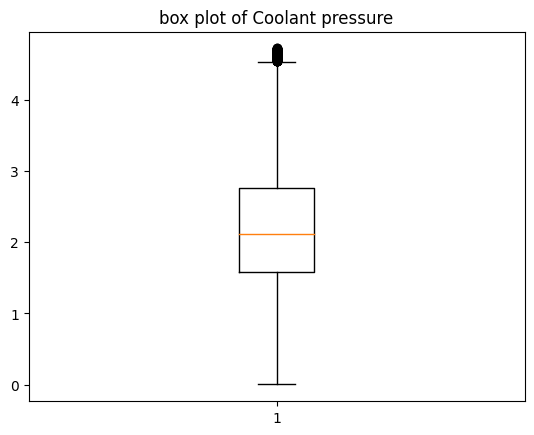

In [ ]:
plt.boxplot(df["Coolant pressure"])
plt.title("box plot of Coolant pressure")

In [ ]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

Text(0.5, 1.0, 'box plot of lub oil temp')

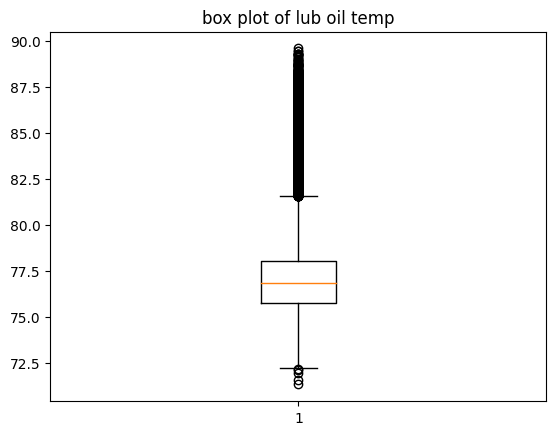

In [ ]:
plt.boxplot(df["lub oil temp"])
plt.title("box plot of lub oil temp")

In [ ]:
q1 = np.percentile(df["lub oil temp"],25, interpolation="midpoint")
q2 = np.percentile(df["lub oil temp"],50, interpolation="midpoint")
q3 = np.percentile(df["lub oil temp"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

75.723003365
76.81221087
78.05482491000001


<ipython-input-632-9863fc583e8a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(df["lub oil temp"],25, interpolation="midpoint")
<ipython-input-632-9863fc583e8a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(df["lub oil temp"],50, interpolation="midpoint")
<ipython-input-632-9863fc583e8a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

72.22527104749997
81.55255722750002


In [ ]:
outlier = []
for x in df["lub oil temp"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[84.14416293,
 83.64658857,
 84.92414335,
 83.33728981,
 84.47375281,
 83.95811494,
 86.45666983,
 81.88824943,
 85.27476256,
 83.66142859,
 84.03223687,
 85.24299314,
 83.56868787,
 84.46371135,
 84.5215851,
 81.62466421,
 82.98158331,
 81.91163998,
 82.87267563,
 86.25077987,
 83.97901049,
 85.02745829,
 84.82589965,
 81.79182907,
 82.92946885,
 83.23664854,
 81.96455459,
 83.51191683,
 86.59158833,
 81.92085432,
 81.94656804,
 82.19162577,
 81.76736141,
 82.15168618,
 84.55627801,
 85.25899559,
 81.70732285,
 87.54407157,
 84.13125189,
 85.93315531,
 84.38738912,
 82.0680808,
 82.49132521,
 82.5224274,
 82.33275985,
 84.61274189,
 85.09802601,
 85.86741582,
 83.42970187,
 86.1320727,
 82.20953109,
 86.71948305,
 83.60575208,
 83.98789429,
 82.1328633,
 81.6329511,
 85.74238726,
 88.60273387,
 86.34149912,
 83.96671616,
 81.76118045,
 87.57330929,
 84.13806782,
 83.47246393,
 81.85690884,
 88.62279222,
 85.15694104,
 87.25092099,
 83.44104638,
 87.79319765,
 83.98750795,
 84.83697761

In [ ]:
ind1 = df["lub oil temp"]>upp_limit
c= df.loc[ind1].index
c

Int64Index([    0,     6,    17,    27,    33,    41,    45,    57,    59,
               68,
            ...
            19479, 19490, 19494, 19497, 19507, 19508, 19510, 19513, 19520,
            19521],
           dtype='int64', length=2291)

In [ ]:
c[:100]

Int64Index([  0,   6,  17,  27,  33,  41,  45,  57,  59,  68,  74,  75,  77,
             87,  92,  95, 103, 105, 106, 111, 112, 117, 129, 151, 159, 165,
            168, 169, 172, 185, 186, 187, 192, 213, 223, 238, 245, 253, 263,
            279, 284, 297, 308, 311, 312, 313, 317, 319, 331, 333, 337, 359,
            364, 368, 372, 373, 374, 376, 378, 396, 409, 415, 425, 429, 431,
            437, 438, 443, 449, 458, 481, 482, 483, 502, 510, 511, 519, 521,
            545, 551, 558, 596, 601, 609, 616, 623, 624, 625, 645, 654, 679,
            680, 686, 690, 691, 705, 706, 715, 721, 726],
           dtype='int64')

In [ ]:
df.drop([0,   6,  17,  27,  33,  41,  45,  57,  59,  68,  74,  75,  77,
             87,  92,  95, 103, 105, 106, 111, 112, 117, 129, 151, 159, 165,
            168, 169, 172, 185, 186, 187, 192, 213, 223, 238, 245, 253, 263,
            279, 284, 297, 308, 311, 312, 313, 317, 319, 331, 333, 337, 359,
            364, 368, 372, 373, 374, 376, 378, 396, 409, 415, 425, 429, 431,
            437, 438, 443, 449, 458, 481, 482, 483, 502, 510, 511, 519, 521,
            545, 551, 558, 596, 601, 609, 616, 623, 624, 625, 645, 654, 679,
            680, 686, 690, 691, 705, 706, 715, 721, 726],inplace=True)

In [ ]:
c[100:200]

Int64Index([ 732,  737,  739,  740,  751,  762,  765,  768,  786,  787,  793,
             805,  835,  839,  849,  851,  853,  855,  874,  876,  879,  890,
             899,  906,  915,  916,  931,  933,  945,  954,  964,  966,  971,
             972,  982,  983,  984, 1009, 1012, 1022, 1024, 1030, 1036, 1041,
            1043, 1044, 1047, 1049, 1063, 1065, 1081, 1090, 1104, 1109, 1137,
            1142, 1146, 1172, 1183, 1187, 1193, 1201, 1219, 1231, 1250, 1269,
            1300, 1308, 1315, 1333, 1343, 1366, 1368, 1385, 1394, 1399, 1428,
            1432, 1449, 1457, 1466, 1484, 1512, 1513, 1514, 1515, 1522, 1524,
            1525, 1545, 1555, 1556, 1587, 1591, 1593, 1613, 1616, 1627, 1650,
            1662],
           dtype='int64')

In [ ]:
df.drop([ 732,  737,  739,  740,  751,  762,  765,  768,  786,  787,  793,
             805,  835,  839,  849,  851,  853,  855,  874,  876,  879,  890,
             899,  906,  915,  916,  931,  933,  945,  954,  964,  966,  971,
             972,  982,  983,  984, 1009, 1012, 1022, 1024, 1030, 1036, 1041,
            1043, 1044, 1047, 1049, 1063, 1065, 1081, 1090, 1104, 1109, 1137,
            1142, 1146, 1172, 1183, 1187, 1193, 1201, 1219, 1231, 1250, 1269,
            1300, 1308, 1315, 1333, 1343, 1366, 1368, 1385, 1394, 1399, 1428,
            1432, 1449, 1457, 1466, 1484, 1512, 1513, 1514, 1515, 1522, 1524,
            1525, 1545, 1555, 1556, 1587, 1591, 1593, 1613, 1616, 1627, 1650,
            1662],inplace=True)

In [ ]:
c[200:300]

Int64Index([1665, 1688, 1695, 1700, 1706, 1710, 1723, 1731, 1732, 1756, 1762,
            1763, 1810, 1838, 1903, 1942, 1947, 1953, 1956, 1961, 1967, 1975,
            1979, 1984, 1996, 2001, 2003, 2006, 2007, 2012, 2015, 2022, 2025,
            2026, 2045, 2049, 2052, 2054, 2057, 2058, 2067, 2068, 2070, 2077,
            2078, 2079, 2083, 2095, 2097, 2110, 2111, 2113, 2141, 2145, 2153,
            2161, 2166, 2167, 2169, 2172, 2182, 2192, 2198, 2207, 2211, 2213,
            2219, 2227, 2243, 2244, 2271, 2284, 2304, 2305, 2315, 2324, 2325,
            2331, 2336, 2350, 2354, 2359, 2368, 2372, 2380, 2385, 2400, 2403,
            2416, 2420, 2421, 2437, 2438, 2470, 2486, 2489, 2496, 2501, 2524,
            2529],
           dtype='int64')

In [ ]:
df.drop([ 1665, 1688, 1695, 1700, 1706, 1710, 1723, 1731, 1732, 1756, 1762,
            1763, 1810, 1838, 1903, 1942, 1947, 1953, 1956, 1961, 1967, 1975,
            1979, 1984, 1996, 2001, 2003, 2006, 2007, 2012, 2015, 2022, 2025,
            2026, 2045, 2049, 2052, 2054, 2057, 2058, 2067, 2068, 2070, 2077,
            2078, 2079, 2083, 2095, 2097, 2110, 2111, 2113, 2141, 2145, 2153,
            2161, 2166, 2167, 2169, 2172, 2182, 2192, 2198, 2207, 2211, 2213,
            2219, 2227, 2243, 2244, 2271, 2284, 2304, 2305, 2315, 2324, 2325,
            2331, 2336, 2350, 2354, 2359, 2368, 2372, 2380, 2385, 2400, 2403,
            2416, 2420, 2421, 2437, 2438, 2470, 2486, 2489, 2496, 2501, 2524,
            2529],inplace=True)

In [ ]:
c[300:400]

Int64Index([2542, 2548, 2551, 2571, 2574, 2575, 2587, 2589, 2596, 2612, 2613,
            2662, 2666, 2667, 2669, 2699, 2707, 2715, 2717, 2720, 2721, 2733,
            2740, 2751, 2754, 2756, 2757, 2765, 2774, 2802, 2814, 2818, 2823,
            2825, 2831, 2832, 2837, 2841, 2884, 2887, 2898, 2906, 2915, 2920,
            2955, 2961, 2984, 2988, 2994, 2996, 3007, 3010, 3023, 3031, 3035,
            3042, 3045, 3049, 3053, 3056, 3059, 3065, 3073, 3074, 3076, 3078,
            3079, 3081, 3093, 3095, 3099, 3102, 3109, 3117, 3120, 3131, 3150,
            3158, 3161, 3187, 3189, 3190, 3194, 3203, 3215, 3234, 3238, 3247,
            3249, 3252, 3269, 3288, 3292, 3300, 3308, 3321, 3322, 3325, 3326,
            3327],
           dtype='int64')

In [ ]:
df.drop([ 2542, 2548, 2551, 2571, 2574, 2575, 2587, 2589, 2596, 2612, 2613,
            2662, 2666, 2667, 2669, 2699, 2707, 2715, 2717, 2720, 2721, 2733,
            2740, 2751, 2754, 2756, 2757, 2765, 2774, 2802, 2814, 2818, 2823,
            2825, 2831, 2832, 2837, 2841, 2884, 2887, 2898, 2906, 2915, 2920,
            2955, 2961, 2984, 2988, 2994, 2996, 3007, 3010, 3023, 3031, 3035,
            3042, 3045, 3049, 3053, 3056, 3059, 3065, 3073, 3074, 3076, 3078,
            3079, 3081, 3093, 3095, 3099, 3102, 3109, 3117, 3120, 3131, 3150,
            3158, 3161, 3187, 3189, 3190, 3194, 3203, 3215, 3234, 3238, 3247,
            3249, 3252, 3269, 3288, 3292, 3300, 3308, 3321, 3322, 3325, 3326,
            3327],inplace=True)

In [ ]:
c[400:500]

Int64Index([3330, 3350, 3371, 3372, 3385, 3397, 3407, 3412, 3413, 3417, 3425,
            3434, 3438, 3442, 3452, 3453, 3488, 3490, 3491, 3506, 3507, 3521,
            3529, 3534, 3538, 3545, 3577, 3578, 3579, 3581, 3586, 3587, 3597,
            3615, 3623, 3633, 3634, 3635, 3639, 3654, 3655, 3672, 3675, 3677,
            3678, 3705, 3728, 3737, 3742, 3747, 3754, 3760, 3768, 3770, 3788,
            3797, 3813, 3817, 3819, 3824, 3827, 3836, 3840, 3853, 3859, 3870,
            3873, 3875, 3880, 3883, 3886, 3889, 3891, 3907, 3920, 3922, 3923,
            3924, 3930, 3933, 3952, 3966, 3973, 3978, 3987, 3993, 3994, 3996,
            4003, 4005, 4018, 4030, 4041, 4063, 4067, 4084, 4085, 4104, 4115,
            4124],
           dtype='int64')

In [ ]:
df.drop([ 3330, 3350, 3371, 3372, 3385, 3397, 3407, 3412, 3413, 3417, 3425,
            3434, 3438, 3442, 3452, 3453, 3488, 3490, 3491, 3506, 3507, 3521,
            3529, 3534, 3538, 3545, 3577, 3578, 3579, 3581, 3586, 3587, 3597,
            3615, 3623, 3633, 3634, 3635, 3639, 3654, 3655, 3672, 3675, 3677,
            3678, 3705, 3728, 3737, 3742, 3747, 3754, 3760, 3768, 3770, 3788,
            3797, 3813, 3817, 3819, 3824, 3827, 3836, 3840, 3853, 3859, 3870,
            3873, 3875, 3880, 3883, 3886, 3889, 3891, 3907, 3920, 3922, 3923,
            3924, 3930, 3933, 3952, 3966, 3973, 3978, 3987, 3993, 3994, 3996,
            4003, 4005, 4018, 4030, 4041, 4063, 4067, 4084, 4085, 4104, 4115,
            4124],inplace=True)

In [ ]:
c[500:600]

Int64Index([4125, 4139, 4160, 4161, 4167, 4176, 4191, 4193, 4199, 4203, 4212,
            4235, 4240, 4247, 4254, 4262, 4275, 4277, 4283, 4289, 4323, 4326,
            4327, 4328, 4329, 4344, 4350, 4353, 4354, 4367, 4395, 4403, 4406,
            4414, 4425, 4433, 4450, 4453, 4454, 4458, 4464, 4471, 4496, 4499,
            4506, 4510, 4512, 4513, 4516, 4521, 4529, 4545, 4559, 4560, 4562,
            4584, 4588, 4592, 4593, 4597, 4624, 4625, 4630, 4641, 4664, 4690,
            4691, 4723, 4724, 4726, 4736, 4749, 4761, 4771, 4778, 4785, 4788,
            4823, 4825, 4833, 4842, 4853, 4871, 4882, 4883, 4895, 4905, 4908,
            4919, 4920, 4941, 4952, 4974, 4991, 5002, 5003, 5006, 5015, 5029,
            5034],
           dtype='int64')

In [ ]:
df.drop([ 4125, 4139, 4160, 4161, 4167, 4176, 4191, 4193, 4199, 4203, 4212,
            4235, 4240, 4247, 4254, 4262, 4275, 4277, 4283, 4289, 4323, 4326,
            4327, 4328, 4329, 4344, 4350, 4353, 4354, 4367, 4395, 4403, 4406,
            4414, 4425, 4433, 4450, 4453, 4454, 4458, 4464, 4471, 4496, 4499,
            4506, 4510, 4512, 4513, 4516, 4521, 4529, 4545, 4559, 4560, 4562,
            4584, 4588, 4592, 4593, 4597, 4624, 4625, 4630, 4641, 4664, 4690,
            4691, 4723, 4724, 4726, 4736, 4749, 4761, 4771, 4778, 4785, 4788,
            4823, 4825, 4833, 4842, 4853, 4871, 4882, 4883, 4895, 4905, 4908,
            4919, 4920, 4941, 4952, 4974, 4991, 5002, 5003, 5006, 5015, 5029,
            5034],inplace=True)

In [ ]:
c[600:700]

Int64Index([5042, 5048, 5054, 5059, 5061, 5064, 5073, 5074, 5078, 5082, 5094,
            5096, 5109, 5144, 5152, 5154, 5164, 5176, 5184, 5201, 5218, 5221,
            5224, 5256, 5261, 5267, 5272, 5277, 5282, 5300, 5301, 5306, 5320,
            5349, 5356, 5359, 5384, 5386, 5392, 5407, 5419, 5444, 5458, 5471,
            5472, 5479, 5487, 5490, 5501, 5506, 5525, 5528, 5530, 5537, 5552,
            5556, 5566, 5580, 5581, 5587, 5588, 5599, 5605, 5614, 5622, 5639,
            5640, 5654, 5664, 5675, 5678, 5685, 5709, 5713, 5728, 5738, 5742,
            5768, 5769, 5790, 5791, 5794, 5800, 5803, 5828, 5831, 5839, 5840,
            5844, 5854, 5856, 5857, 5867, 5891, 5894, 5904, 5918, 5922, 5925,
            5928],
           dtype='int64')

In [ ]:
df.drop([ 5042, 5048, 5054, 5059, 5061, 5064, 5073, 5074, 5078, 5082, 5094,
            5096, 5109, 5144, 5152, 5154, 5164, 5176, 5184, 5201, 5218, 5221,
            5224, 5256, 5261, 5267, 5272, 5277, 5282, 5300, 5301, 5306, 5320,
            5349, 5356, 5359, 5384, 5386, 5392, 5407, 5419, 5444, 5458, 5471,
            5472, 5479, 5487, 5490, 5501, 5506, 5525, 5528, 5530, 5537, 5552,
            5556, 5566, 5580, 5581, 5587, 5588, 5599, 5605, 5614, 5622, 5639,
            5640, 5654, 5664, 5675, 5678, 5685, 5709, 5713, 5728, 5738, 5742,
            5768, 5769, 5790, 5791, 5794, 5800, 5803, 5828, 5831, 5839, 5840,
            5844, 5854, 5856, 5857, 5867, 5891, 5894, 5904, 5918, 5922, 5925,
            5928],inplace=True)

In [ ]:
c[700:800]

Int64Index([5930, 5934, 5955, 5956, 5958, 5960, 5966, 5999, 6002, 6007, 6013,
            6032, 6040, 6048, 6050, 6055, 6056, 6061, 6086, 6092, 6112, 6114,
            6115, 6130, 6150, 6151, 6153, 6156, 6157, 6170, 6173, 6175, 6176,
            6177, 6186, 6189, 6205, 6225, 6268, 6276, 6282, 6300, 6304, 6307,
            6309, 6316, 6318, 6319, 6321, 6326, 6349, 6358, 6365, 6382, 6386,
            6387, 6388, 6396, 6405, 6414, 6424, 6434, 6442, 6444, 6447, 6457,
            6474, 6479, 6483, 6488, 6493, 6498, 6499, 6503, 6509, 6516, 6530,
            6554, 6556, 6558, 6564, 6569, 6570, 6574, 6589, 6594, 6610, 6613,
            6617, 6619, 6622, 6630, 6639, 6659, 6669, 6672, 6681, 6683, 6688,
            6689],
           dtype='int64')

In [ ]:
df.drop([ 5930, 5934, 5955, 5956, 5958, 5960, 5966, 5999, 6002, 6007, 6013,
            6032, 6040, 6048, 6050, 6055, 6056, 6061, 6086, 6092, 6112, 6114,
            6115, 6130, 6150, 6151, 6153, 6156, 6157, 6170, 6173, 6175, 6176,
            6177, 6186, 6189, 6205, 6225, 6268, 6276, 6282, 6300, 6304, 6307,
            6309, 6316, 6318, 6319, 6321, 6326, 6349, 6358, 6365, 6382, 6386,
            6387, 6388, 6396, 6405, 6414, 6424, 6434, 6442, 6444, 6447, 6457,
            6474, 6479, 6483, 6488, 6493, 6498, 6499, 6503, 6509, 6516, 6530,
            6554, 6556, 6558, 6564, 6569, 6570, 6574, 6589, 6594, 6610, 6613,
            6617, 6619, 6622, 6630, 6639, 6659, 6669, 6672, 6681, 6683, 6688,
            6689],inplace=True)

In [ ]:
c[800:900]

Int64Index([6706, 6711, 6713, 6720, 6724, 6738, 6745, 6756, 6759, 6761, 6772,
            6775, 6778, 6779, 6789, 6804, 6814, 6834, 6848, 6856, 6858, 6863,
            6877, 6898, 6902, 6909, 6910, 6938, 6940, 6942, 6946, 6948, 6955,
            6964, 6965, 6969, 6974, 6975, 6989, 7028, 7054, 7056, 7072, 7080,
            7082, 7083, 7090, 7093, 7094, 7095, 7111, 7116, 7132, 7136, 7145,
            7148, 7149, 7163, 7169, 7175, 7186, 7195, 7205, 7225, 7240, 7244,
            7246, 7249, 7251, 7254, 7263, 7264, 7273, 7275, 7277, 7286, 7291,
            7313, 7315, 7337, 7351, 7353, 7370, 7374, 7394, 7419, 7432, 7434,
            7436, 7453, 7454, 7461, 7465, 7476, 7478, 7502, 7522, 7556, 7557,
            7559],
           dtype='int64')

In [ ]:
df.drop([ 6706, 6711, 6713, 6720, 6724, 6738, 6745, 6756, 6759, 6761, 6772,
            6775, 6778, 6779, 6789, 6804, 6814, 6834, 6848, 6856, 6858, 6863,
            6877, 6898, 6902, 6909, 6910, 6938, 6940, 6942, 6946, 6948, 6955,
            6964, 6965, 6969, 6974, 6975, 6989, 7028, 7054, 7056, 7072, 7080,
            7082, 7083, 7090, 7093, 7094, 7095, 7111, 7116, 7132, 7136, 7145,
            7148, 7149, 7163, 7169, 7175, 7186, 7195, 7205, 7225, 7240, 7244,
            7246, 7249, 7251, 7254, 7263, 7264, 7273, 7275, 7277, 7286, 7291,
            7313, 7315, 7337, 7351, 7353, 7370, 7374, 7394, 7419, 7432, 7434,
            7436, 7453, 7454, 7461, 7465, 7476, 7478, 7502, 7522, 7556, 7557,
            7559],inplace=True)

In [ ]:
c[900:1000]

Int64Index([7562, 7571, 7587, 7610, 7619, 7629, 7632, 7638, 7644, 7681, 7684,
            7692, 7702, 7714, 7735, 7751, 7765, 7771, 7774, 7785, 7791, 7794,
            7817, 7818, 7824, 7832, 7837, 7841, 7843, 7848, 7880, 7897, 7901,
            7902, 7906, 7907, 7913, 7916, 7920, 7926, 7932, 7943, 7952, 7953,
            7960, 7965, 7968, 7971, 7974, 7982, 8005, 8010, 8011, 8026, 8027,
            8034, 8043, 8044, 8054, 8056, 8062, 8066, 8067, 8070, 8077, 8093,
            8120, 8124, 8131, 8134, 8137, 8148, 8157, 8162, 8166, 8170, 8182,
            8183, 8197, 8200, 8214, 8222, 8231, 8258, 8278, 8294, 8306, 8323,
            8326, 8336, 8337, 8338, 8354, 8363, 8377, 8386, 8404, 8405, 8407,
            8412],
           dtype='int64')

In [ ]:
df.drop([ 7562, 7571, 7587, 7610, 7619, 7629, 7632, 7638, 7644, 7681, 7684,
            7692, 7702, 7714, 7735, 7751, 7765, 7771, 7774, 7785, 7791, 7794,
            7817, 7818, 7824, 7832, 7837, 7841, 7843, 7848, 7880, 7897, 7901,
            7902, 7906, 7907, 7913, 7916, 7920, 7926, 7932, 7943, 7952, 7953,
            7960, 7965, 7968, 7971, 7974, 7982, 8005, 8010, 8011, 8026, 8027,
            8034, 8043, 8044, 8054, 8056, 8062, 8066, 8067, 8070, 8077, 8093,
            8120, 8124, 8131, 8134, 8137, 8148, 8157, 8162, 8166, 8170, 8182,
            8183, 8197, 8200, 8214, 8222, 8231, 8258, 8278, 8294, 8306, 8323,
            8326, 8336, 8337, 8338, 8354, 8363, 8377, 8386, 8404, 8405, 8407,
            8412],inplace=True)

In [ ]:
c[1000:1100]

Int64Index([8427, 8437, 8441, 8446, 8453, 8458, 8459, 8469, 8472, 8478, 8484,
            8491, 8497, 8502, 8504, 8537, 8539, 8544, 8569, 8574, 8585, 8589,
            8591, 8610, 8613, 8615, 8616, 8620, 8628, 8644, 8707, 8711, 8713,
            8714, 8745, 8749, 8759, 8762, 8769, 8773, 8780, 8781, 8784, 8785,
            8796, 8810, 8812, 8814, 8815, 8819, 8822, 8834, 8839, 8841, 8842,
            8847, 8848, 8851, 8869, 8871, 8873, 8889, 8895, 8903, 8906, 8912,
            8923, 8938, 8949, 8950, 8956, 8961, 8965, 8971, 8972, 8980, 8984,
            8990, 9001, 9002, 9013, 9047, 9088, 9090, 9092, 9110, 9115, 9125,
            9132, 9133, 9154, 9156, 9161, 9175, 9194, 9199, 9205, 9231, 9252,
            9255],
           dtype='int64')

In [ ]:
df.drop([8427, 8437, 8441, 8446, 8453, 8458, 8459, 8469, 8472, 8478, 8484,
            8491, 8497, 8502, 8504, 8537, 8539, 8544, 8569, 8574, 8585, 8589,
            8591, 8610, 8613, 8615, 8616, 8620, 8628, 8644, 8707, 8711, 8713,
            8714, 8745, 8749, 8759, 8762, 8769, 8773, 8780, 8781, 8784, 8785,
            8796, 8810, 8812, 8814, 8815, 8819, 8822, 8834, 8839, 8841, 8842,
            8847, 8848, 8851, 8869, 8871, 8873, 8889, 8895, 8903, 8906, 8912,
            8923, 8938, 8949, 8950, 8956, 8961, 8965, 8971, 8972, 8980, 8984,
            8990, 9001, 9002, 9013, 9047, 9088, 9090, 9092, 9110, 9115, 9125,
            9132, 9133, 9154, 9156, 9161, 9175, 9194, 9199, 9205, 9231, 9252,
            9255],inplace=True)

In [ ]:
c[1100:1200]

Int64Index([ 9256,  9266,  9269,  9273,  9281,  9304,  9308,  9310,  9317,
             9324,  9338,  9339,  9342,  9345,  9349,  9352,  9357,  9367,
             9381,  9391,  9404,  9407,  9416,  9424,  9443,  9457,  9458,
             9462,  9463,  9470,  9489,  9496,  9510,  9521,  9533,  9539,
             9543,  9552,  9570,  9577,  9580,  9632,  9639,  9646,  9663,
             9664,  9671,  9672,  9682,  9687,  9697,  9705,  9709,  9715,
             9720,  9722,  9726,  9728,  9736,  9747,  9748,  9752,  9759,
             9767,  9788,  9789,  9795,  9809,  9819,  9824,  9830,  9832,
             9849,  9854,  9865,  9866,  9872,  9886,  9889,  9893,  9894,
             9910,  9912,  9925,  9959,  9966, 10012, 10017, 10023, 10028,
            10047, 10058, 10064, 10081, 10084, 10085, 10087, 10090, 10091,
            10100],
           dtype='int64')

In [ ]:
df.drop([9256,  9266,  9269,  9273,  9281,  9304,  9308,  9310,  9317,
             9324,  9338,  9339,  9342,  9345,  9349,  9352,  9357,  9367,
             9381,  9391,  9404,  9407,  9416,  9424,  9443,  9457,  9458,
             9462,  9463,  9470,  9489,  9496,  9510,  9521,  9533,  9539,
             9543,  9552,  9570,  9577,  9580,  9632,  9639,  9646,  9663,
             9664,  9671,  9672,  9682,  9687,  9697,  9705,  9709,  9715,
             9720,  9722,  9726,  9728,  9736,  9747,  9748,  9752,  9759,
             9767,  9788,  9789,  9795,  9809,  9819,  9824,  9830,  9832,
             9849,  9854,  9865,  9866,  9872,  9886,  9889,  9893,  9894,
             9910,  9912,  9925,  9959,  9966, 10012, 10017, 10023, 10028,
            10047, 10058, 10064, 10081, 10084, 10085, 10087, 10090, 10091,
            10100],inplace=True)

In [ ]:
c[1200:1300]

Int64Index([10104, 10109, 10116, 10128, 10135, 10151, 10163, 10205, 10216,
            10239, 10245, 10249, 10250, 10259, 10260, 10261, 10262, 10265,
            10267, 10298, 10302, 10320, 10335, 10336, 10337, 10338, 10342,
            10355, 10371, 10384, 10391, 10402, 10411, 10413, 10419, 10431,
            10435, 10450, 10458, 10461, 10466, 10469, 10470, 10500, 10520,
            10524, 10534, 10535, 10537, 10552, 10575, 10591, 10592, 10596,
            10604, 10615, 10617, 10632, 10649, 10671, 10689, 10695, 10701,
            10724, 10737, 10747, 10765, 10773, 10776, 10780, 10784, 10786,
            10794, 10815, 10823, 10825, 10861, 10862, 10883, 10891, 10894,
            10901, 10917, 10921, 10922, 10934, 10936, 10937, 10956, 10959,
            10963, 10977, 10980, 10987, 10996, 10999, 11002, 11004, 11013,
            11037],
           dtype='int64')

In [ ]:
df.drop([10104, 10109, 10116, 10128, 10135, 10151, 10163, 10205, 10216,
            10239, 10245, 10249, 10250, 10259, 10260, 10261, 10262, 10265,
            10267, 10298, 10302, 10320, 10335, 10336, 10337, 10338, 10342,
            10355, 10371, 10384, 10391, 10402, 10411, 10413, 10419, 10431,
            10435, 10450, 10458, 10461, 10466, 10469, 10470, 10500, 10520,
            10524, 10534, 10535, 10537, 10552, 10575, 10591, 10592, 10596,
            10604, 10615, 10617, 10632, 10649, 10671, 10689, 10695, 10701,
            10724, 10737, 10747, 10765, 10773, 10776, 10780, 10784, 10786,
            10794, 10815, 10823, 10825, 10861, 10862, 10883, 10891, 10894,
            10901, 10917, 10921, 10922, 10934, 10936, 10937, 10956, 10959,
            10963, 10977, 10980, 10987, 10996, 10999, 11002, 11004, 11013,
            11037],inplace=True)

In [ ]:
c[1300:1400]

Int64Index([11052, 11054, 11059, 11065, 11071, 11074, 11091, 11092, 11131,
            11147, 11162, 11173, 11176, 11181, 11183, 11186, 11190, 11197,
            11202, 11203, 11212, 11215, 11222, 11226, 11230, 11238, 11240,
            11254, 11262, 11268, 11270, 11273, 11276, 11302, 11319, 11326,
            11330, 11337, 11342, 11343, 11349, 11354, 11358, 11365, 11379,
            11384, 11387, 11388, 11392, 11403, 11416, 11431, 11453, 11455,
            11466, 11468, 11493, 11494, 11509, 11517, 11527, 11530, 11561,
            11567, 11568, 11572, 11573, 11586, 11595, 11597, 11605, 11621,
            11626, 11644, 11647, 11648, 11649, 11655, 11661, 11662, 11666,
            11675, 11682, 11692, 11693, 11720, 11721, 11737, 11739, 11746,
            11747, 11790, 11793, 11800, 11803, 11822, 11831, 11834, 11838,
            11843],
           dtype='int64')

In [ ]:
df.drop([11052, 11054, 11059, 11065, 11071, 11074, 11091, 11092, 11131,
            11147, 11162, 11173, 11176, 11181, 11183, 11186, 11190, 11197,
            11202, 11203, 11212, 11215, 11222, 11226, 11230, 11238, 11240,
            11254, 11262, 11268, 11270, 11273, 11276, 11302, 11319, 11326,
            11330, 11337, 11342, 11343, 11349, 11354, 11358, 11365, 11379,
            11384, 11387, 11388, 11392, 11403, 11416, 11431, 11453, 11455,
            11466, 11468, 11493, 11494, 11509, 11517, 11527, 11530, 11561,
            11567, 11568, 11572, 11573, 11586, 11595, 11597, 11605, 11621,
            11626, 11644, 11647, 11648, 11649, 11655, 11661, 11662, 11666,
            11675, 11682, 11692, 11693, 11720, 11721, 11737, 11739, 11746,
            11747, 11790, 11793, 11800, 11803, 11822, 11831, 11834, 11838,
            11843],inplace=True)

In [ ]:
c[1400:1500]

Int64Index([11850, 11861, 11867, 11899, 11902, 11905, 11906, 11912, 11931,
            11932, 11944, 11945, 11947, 11963, 11966, 11970, 11977, 11980,
            11993, 12010, 12013, 12014, 12032, 12034, 12035, 12040, 12048,
            12049, 12052, 12057, 12072, 12075, 12096, 12098, 12111, 12119,
            12122, 12143, 12145, 12150, 12155, 12156, 12170, 12173, 12177,
            12215, 12220, 12225, 12231, 12233, 12235, 12253, 12259, 12279,
            12283, 12303, 12310, 12317, 12326, 12350, 12363, 12371, 12374,
            12377, 12402, 12404, 12419, 12432, 12444, 12445, 12453, 12463,
            12473, 12474, 12483, 12490, 12500, 12506, 12541, 12548, 12564,
            12585, 12591, 12609, 12627, 12643, 12647, 12650, 12653, 12655,
            12670, 12684, 12735, 12753, 12771, 12775, 12787, 12791, 12819,
            12827],
           dtype='int64')

In [ ]:
df.drop([11850, 11861, 11867, 11899, 11902, 11905, 11906, 11912, 11931,
            11932, 11944, 11945, 11947, 11963, 11966, 11970, 11977, 11980,
            11993, 12010, 12013, 12014, 12032, 12034, 12035, 12040, 12048,
            12049, 12052, 12057, 12072, 12075, 12096, 12098, 12111, 12119,
            12122, 12143, 12145, 12150, 12155, 12156, 12170, 12173, 12177,
            12215, 12220, 12225, 12231, 12233, 12235, 12253, 12259, 12279,
            12283, 12303, 12310, 12317, 12326, 12350, 12363, 12371, 12374,
            12377, 12402, 12404, 12419, 12432, 12444, 12445, 12453, 12463,
            12473, 12474, 12483, 12490, 12500, 12506, 12541, 12548, 12564,
            12585, 12591, 12609, 12627, 12643, 12647, 12650, 12653, 12655,
            12670, 12684, 12735, 12753, 12771, 12775, 12787, 12791, 12819,
            12827],inplace=True)

In [ ]:
c[1500:1600]

Int64Index([12831, 12836, 12852, 12854, 12870, 12882, 12887, 12891, 12905,
            12915, 12940, 12946, 12947, 12948, 12957, 12958, 12972, 12977,
            12996, 13004, 13025, 13027, 13028, 13044, 13052, 13061, 13064,
            13069, 13097, 13103, 13107, 13108, 13109, 13110, 13111, 13128,
            13129, 13139, 13147, 13151, 13164, 13168, 13172, 13193, 13233,
            13241, 13248, 13262, 13266, 13276, 13288, 13296, 13318, 13335,
            13336, 13338, 13345, 13348, 13355, 13360, 13370, 13383, 13392,
            13394, 13397, 13403, 13409, 13424, 13427, 13437, 13450, 13460,
            13468, 13485, 13487, 13488, 13492, 13493, 13515, 13517, 13519,
            13521, 13523, 13537, 13547, 13555, 13556, 13561, 13566, 13570,
            13575, 13579, 13589, 13595, 13600, 13608, 13622, 13644, 13665,
            13666],
           dtype='int64')

In [ ]:
df.drop([12831, 12836, 12852, 12854, 12870, 12882, 12887, 12891, 12905,
            12915, 12940, 12946, 12947, 12948, 12957, 12958, 12972, 12977,
            12996, 13004, 13025, 13027, 13028, 13044, 13052, 13061, 13064,
            13069, 13097, 13103, 13107, 13108, 13109, 13110, 13111, 13128,
            13129, 13139, 13147, 13151, 13164, 13168, 13172, 13193, 13233,
            13241, 13248, 13262, 13266, 13276, 13288, 13296, 13318, 13335,
            13336, 13338, 13345, 13348, 13355, 13360, 13370, 13383, 13392,
            13394, 13397, 13403, 13409, 13424, 13427, 13437, 13450, 13460,
            13468, 13485, 13487, 13488, 13492, 13493, 13515, 13517, 13519,
            13521, 13523, 13537, 13547, 13555, 13556, 13561, 13566, 13570,
            13575, 13579, 13589, 13595, 13600, 13608, 13622, 13644, 13665,
            13666],inplace=True)

In [ ]:
c[1600:1700]

Int64Index([13667, 13669, 13680, 13688, 13691, 13711, 13720, 13727, 13729,
            13730, 13765, 13768, 13774, 13781, 13783, 13785, 13793, 13795,
            13810, 13847, 13861, 13862, 13866, 13877, 13891, 13895, 13899,
            13905, 13908, 13910, 13911, 13935, 13950, 13962, 13975, 13982,
            13984, 14008, 14015, 14017, 14031, 14036, 14048, 14052, 14073,
            14082, 14089, 14101, 14104, 14120, 14125, 14128, 14135, 14139,
            14143, 14147, 14167, 14192, 14199, 14208, 14210, 14211, 14214,
            14219, 14222, 14224, 14240, 14241, 14243, 14256, 14264, 14266,
            14270, 14272, 14280, 14294, 14301, 14303, 14316, 14326, 14336,
            14340, 14349, 14368, 14373, 14382, 14388, 14403, 14418, 14420,
            14423, 14424, 14461, 14475, 14502, 14503, 14508, 14511, 14523,
            14533],
           dtype='int64')

In [ ]:
df.drop([13667, 13669, 13680, 13688, 13691, 13711, 13720, 13727, 13729,
            13730, 13765, 13768, 13774, 13781, 13783, 13785, 13793, 13795,
            13810, 13847, 13861, 13862, 13866, 13877, 13891, 13895, 13899,
            13905, 13908, 13910, 13911, 13935, 13950, 13962, 13975, 13982,
            13984, 14008, 14015, 14017, 14031, 14036, 14048, 14052, 14073,
            14082, 14089, 14101, 14104, 14120, 14125, 14128, 14135, 14139,
            14143, 14147, 14167, 14192, 14199, 14208, 14210, 14211, 14214,
            14219, 14222, 14224, 14240, 14241, 14243, 14256, 14264, 14266,
            14270, 14272, 14280, 14294, 14301, 14303, 14316, 14326, 14336,
            14340, 14349, 14368, 14373, 14382, 14388, 14403, 14418, 14420,
            14423, 14424, 14461, 14475, 14502, 14503, 14508, 14511, 14523,
            14533],inplace=True)

In [ ]:
c[1700:1800]

Int64Index([14537, 14549, 14562, 14563, 14564, 14568, 14574, 14577, 14581,
            14586, 14588, 14590, 14592, 14593, 14595, 14623, 14647, 14652,
            14667, 14686, 14695, 14703, 14725, 14726, 14737, 14745, 14753,
            14756, 14758, 14764, 14810, 14819, 14831, 14836, 14843, 14854,
            14861, 14872, 14874, 14891, 14916, 14927, 14930, 14933, 14963,
            14973, 14976, 14986, 14992, 14994, 15019, 15024, 15029, 15034,
            15046, 15057, 15061, 15072, 15073, 15106, 15152, 15153, 15161,
            15170, 15191, 15192, 15195, 15196, 15198, 15204, 15208, 15210,
            15211, 15217, 15225, 15230, 15233, 15269, 15280, 15285, 15317,
            15331, 15333, 15340, 15341, 15353, 15363, 15365, 15370, 15388,
            15415, 15433, 15439, 15441, 15460, 15482, 15484, 15490, 15504,
            15517],
           dtype='int64')

In [ ]:
df.drop([14537, 14549, 14562, 14563, 14564, 14568, 14574, 14577, 14581,
            14586, 14588, 14590, 14592, 14593, 14595, 14623, 14647, 14652,
            14667, 14686, 14695, 14703, 14725, 14726, 14737, 14745, 14753,
            14756, 14758, 14764, 14810, 14819, 14831, 14836, 14843, 14854,
            14861, 14872, 14874, 14891, 14916, 14927, 14930, 14933, 14963,
            14973, 14976, 14986, 14992, 14994, 15019, 15024, 15029, 15034,
            15046, 15057, 15061, 15072, 15073, 15106, 15152, 15153, 15161,
            15170, 15191, 15192, 15195, 15196, 15198, 15204, 15208, 15210,
            15211, 15217, 15225, 15230, 15233, 15269, 15280, 15285, 15317,
            15331, 15333, 15340, 15341, 15353, 15363, 15365, 15370, 15388,
            15415, 15433, 15439, 15441, 15460, 15482, 15484, 15490, 15504,
            15517],inplace=True)

In [ ]:
c[1800:1900]

Int64Index([15519, 15536, 15553, 15556, 15558, 15563, 15564, 15571, 15587,
            15594, 15598, 15614, 15659, 15665, 15666, 15668, 15674, 15675,
            15688, 15691, 15696, 15698, 15699, 15707, 15711, 15717, 15721,
            15747, 15755, 15757, 15765, 15801, 15817, 15826, 15827, 15836,
            15852, 15857, 15864, 15873, 15874, 15904, 15907, 15908, 15916,
            15933, 15944, 15949, 15957, 15964, 15965, 15977, 15999, 16008,
            16015, 16020, 16022, 16024, 16041, 16059, 16061, 16064, 16072,
            16101, 16102, 16113, 16116, 16117, 16119, 16121, 16122, 16127,
            16143, 16149, 16153, 16161, 16168, 16173, 16184, 16207, 16208,
            16222, 16226, 16228, 16229, 16231, 16245, 16248, 16263, 16277,
            16283, 16290, 16298, 16300, 16301, 16311, 16315, 16318, 16319,
            16324],
           dtype='int64')

In [ ]:
df.drop([15519, 15536, 15553, 15556, 15558, 15563, 15564, 15571, 15587,
            15594, 15598, 15614, 15659, 15665, 15666, 15668, 15674, 15675,
            15688, 15691, 15696, 15698, 15699, 15707, 15711, 15717, 15721,
            15747, 15755, 15757, 15765, 15801, 15817, 15826, 15827, 15836,
            15852, 15857, 15864, 15873, 15874, 15904, 15907, 15908, 15916,
            15933, 15944, 15949, 15957, 15964, 15965, 15977, 15999, 16008,
            16015, 16020, 16022, 16024, 16041, 16059, 16061, 16064, 16072,
            16101, 16102, 16113, 16116, 16117, 16119, 16121, 16122, 16127,
            16143, 16149, 16153, 16161, 16168, 16173, 16184, 16207, 16208,
            16222, 16226, 16228, 16229, 16231, 16245, 16248, 16263, 16277,
            16283, 16290, 16298, 16300, 16301, 16311, 16315, 16318, 16319,
            16324],inplace=True)

In [ ]:
c[1900:2000]

Int64Index([16325, 16351, 16358, 16361, 16371, 16412, 16413, 16415, 16416,
            16424, 16433, 16435, 16439, 16442, 16452, 16453, 16456, 16461,
            16462, 16477, 16500, 16526, 16529, 16549, 16561, 16574, 16575,
            16578, 16600, 16607, 16613, 16614, 16617, 16620, 16622, 16632,
            16635, 16643, 16652, 16655, 16666, 16676, 16679, 16686, 16692,
            16696, 16716, 16732, 16735, 16741, 16742, 16750, 16762, 16765,
            16774, 16781, 16794, 16806, 16807, 16817, 16830, 16843, 16848,
            16850, 16857, 16869, 16893, 16901, 16903, 16919, 16922, 16933,
            16943, 16948, 16949, 16951, 16963, 16969, 16973, 16980, 16983,
            17001, 17005, 17018, 17033, 17037, 17042, 17045, 17048, 17075,
            17084, 17085, 17093, 17094, 17105, 17107, 17109, 17137, 17140,
            17141],
           dtype='int64')

In [ ]:
df.drop([16325, 16351, 16358, 16361, 16371, 16412, 16413, 16415, 16416,
            16424, 16433, 16435, 16439, 16442, 16452, 16453, 16456, 16461,
            16462, 16477, 16500, 16526, 16529, 16549, 16561, 16574, 16575,
            16578, 16600, 16607, 16613, 16614, 16617, 16620, 16622, 16632,
            16635, 16643, 16652, 16655, 16666, 16676, 16679, 16686, 16692,
            16696, 16716, 16732, 16735, 16741, 16742, 16750, 16762, 16765,
            16774, 16781, 16794, 16806, 16807, 16817, 16830, 16843, 16848,
            16850, 16857, 16869, 16893, 16901, 16903, 16919, 16922, 16933,
            16943, 16948, 16949, 16951, 16963, 16969, 16973, 16980, 16983,
            17001, 17005, 17018, 17033, 17037, 17042, 17045, 17048, 17075,
            17084, 17085, 17093, 17094, 17105, 17107, 17109, 17137, 17140,
            17141],inplace=True)

In [ ]:
c[2000:2100]

Int64Index([17143, 17154, 17171, 17180, 17185, 17189, 17191, 17194, 17201,
            17203, 17222, 17233, 17234, 17249, 17253, 17268, 17269, 17280,
            17284, 17297, 17301, 17314, 17315, 17320, 17322, 17326, 17331,
            17334, 17336, 17347, 17363, 17370, 17385, 17387, 17394, 17398,
            17402, 17416, 17421, 17425, 17429, 17441, 17451, 17485, 17511,
            17523, 17526, 17528, 17531, 17538, 17549, 17555, 17567, 17568,
            17569, 17570, 17593, 17594, 17595, 17604, 17611, 17613, 17620,
            17626, 17634, 17648, 17651, 17663, 17666, 17674, 17684, 17699,
            17713, 17715, 17728, 17731, 17733, 17736, 17743, 17748, 17757,
            17761, 17775, 17790, 17808, 17809, 17827, 17828, 17829, 17832,
            17836, 17840, 17841, 17844, 17866, 17867, 17869, 17885, 17897,
            17908],
           dtype='int64')

In [ ]:
df.drop([17143, 17154, 17171, 17180, 17185, 17189, 17191, 17194, 17201,
            17203, 17222, 17233, 17234, 17249, 17253, 17268, 17269, 17280,
            17284, 17297, 17301, 17314, 17315, 17320, 17322, 17326, 17331,
            17334, 17336, 17347, 17363, 17370, 17385, 17387, 17394, 17398,
            17402, 17416, 17421, 17425, 17429, 17441, 17451, 17485, 17511,
            17523, 17526, 17528, 17531, 17538, 17549, 17555, 17567, 17568,
            17569, 17570, 17593, 17594, 17595, 17604, 17611, 17613, 17620,
            17626, 17634, 17648, 17651, 17663, 17666, 17674, 17684, 17699,
            17713, 17715, 17728, 17731, 17733, 17736, 17743, 17748, 17757,
            17761, 17775, 17790, 17808, 17809, 17827, 17828, 17829, 17832,
            17836, 17840, 17841, 17844, 17866, 17867, 17869, 17885, 17897,
            17908],inplace=True)

In [ ]:
c[2100:2200]

Int64Index([17924, 17938, 17943, 17944, 17946, 17957, 17975, 17988, 18001,
            18019, 18020, 18023, 18030, 18035, 18045, 18057, 18073, 18076,
            18086, 18090, 18098, 18107, 18115, 18120, 18121, 18125, 18128,
            18146, 18147, 18149, 18150, 18159, 18160, 18182, 18184, 18186,
            18208, 18233, 18235, 18240, 18247, 18254, 18269, 18270, 18277,
            18284, 18302, 18313, 18331, 18352, 18353, 18363, 18385, 18393,
            18395, 18419, 18430, 18487, 18490, 18506, 18508, 18513, 18518,
            18520, 18521, 18548, 18566, 18570, 18571, 18585, 18592, 18596,
            18598, 18614, 18621, 18630, 18639, 18642, 18644, 18650, 18682,
            18686, 18709, 18717, 18720, 18724, 18731, 18735, 18743, 18751,
            18763, 18768, 18777, 18784, 18791, 18792, 18797, 18810, 18812,
            18819],
           dtype='int64')

In [ ]:
df.drop([17924, 17938, 17943, 17944, 17946, 17957, 17975, 17988, 18001,
            18019, 18020, 18023, 18030, 18035, 18045, 18057, 18073, 18076,
            18086, 18090, 18098, 18107, 18115, 18120, 18121, 18125, 18128,
            18146, 18147, 18149, 18150, 18159, 18160, 18182, 18184, 18186,
            18208, 18233, 18235, 18240, 18247, 18254, 18269, 18270, 18277,
            18284, 18302, 18313, 18331, 18352, 18353, 18363, 18385, 18393,
            18395, 18419, 18430, 18487, 18490, 18506, 18508, 18513, 18518,
            18520, 18521, 18548, 18566, 18570, 18571, 18585, 18592, 18596,
            18598, 18614, 18621, 18630, 18639, 18642, 18644, 18650, 18682,
            18686, 18709, 18717, 18720, 18724, 18731, 18735, 18743, 18751,
            18763, 18768, 18777, 18784, 18791, 18792, 18797, 18810, 18812,
            18819],inplace=True)

In [ ]:
c[2200:2300]

Int64Index([18821, 18827, 18835, 18840, 18843, 18851, 18852, 18861, 18864,
            18867, 18886, 18893, 18900, 18904, 18906, 18913, 18920, 18925,
            18927, 18944, 18954, 18961, 18965, 18974, 18991, 18993, 18994,
            19003, 19013, 19015, 19028, 19058, 19078, 19079, 19095, 19098,
            19101, 19119, 19124, 19129, 19135, 19143, 19147, 19160, 19179,
            19183, 19188, 19189, 19197, 19200, 19201, 19202, 19216, 19219,
            19220, 19235, 19239, 19248, 19254, 19265, 19269, 19270, 19273,
            19274, 19276, 19277, 19292, 19316, 19333, 19336, 19337, 19350,
            19356, 19360, 19364, 19381, 19402, 19415, 19442, 19459, 19472,
            19479, 19490, 19494, 19497, 19507, 19508, 19510, 19513, 19520,
            19521],
           dtype='int64')

In [ ]:
df.drop([18821, 18827, 18835, 18840, 18843, 18851, 18852, 18861, 18864,
            18867, 18886, 18893, 18900, 18904, 18906, 18913, 18920, 18925,
            18927, 18944, 18954, 18961, 18965, 18974, 18991, 18993, 18994,
            19003, 19013, 19015, 19028, 19058, 19078, 19079, 19095, 19098,
            19101, 19119, 19124, 19129, 19135, 19143, 19147, 19160, 19179,
            19183, 19188, 19189, 19197, 19200, 19201, 19202, 19216, 19219,
            19220, 19235, 19239, 19248, 19254, 19265, 19269, 19270, 19273,
            19274, 19276, 19277, 19292, 19316, 19333, 19336, 19337, 19350,
            19356, 19360, 19364, 19381, 19402, 19415, 19442, 19459, 19472,
            19479, 19490, 19494, 19497, 19507, 19508, 19510, 19513, 19520,
            19521],inplace=True)

In [ ]:
ind1 = df["lub oil temp"]<low_limit
df.loc[ind1].index

Int64Index([2299, 4099, 7679, 8919, 9318], dtype='int64')

In [ ]:
df.drop([2299, 4099, 7679, 8919, 9318],inplace=True)

In [ ]:
outlier = []
for x in df["lub oil temp"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of lub oil temp')

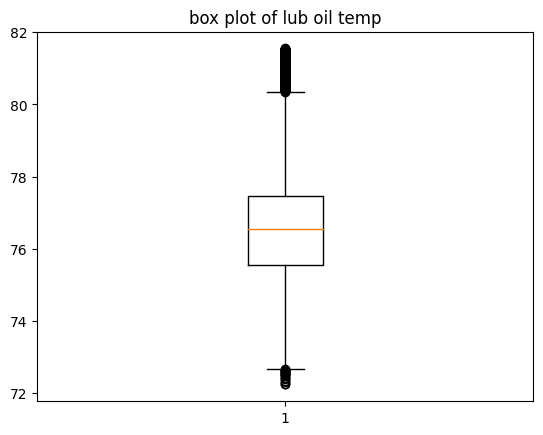

In [ ]:
plt.boxplot(df["lub oil temp"])
plt.title("box plot of lub oil temp")

In [ ]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

Text(0.5, 1.0, 'box plot of Coolant temp')

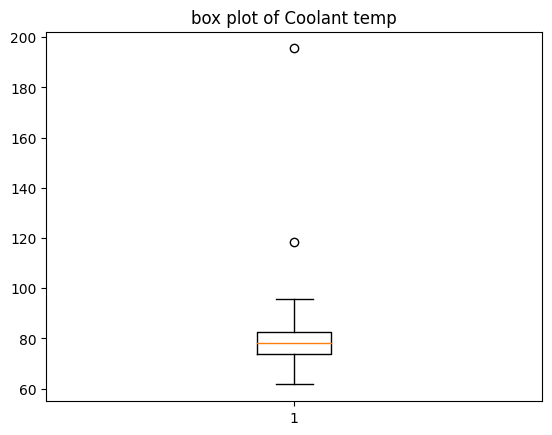

In [ ]:
plt.boxplot(df["Coolant temp"])
plt.title("box plot of Coolant temp")

In [ ]:
q1 = np.percentile(df["Coolant temp"],25, interpolation="midpoint")
q2 = np.percentile(df["Coolant temp"],50, interpolation="midpoint")
q3 = np.percentile(df["Coolant temp"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

73.714272645
78.20253367
82.770537905


<ipython-input-693-309726960c77>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(df["Coolant temp"],25, interpolation="midpoint")
<ipython-input-693-309726960c77>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(df["Coolant temp"],50, interpolation="midpoint")
<ipython-input-693-309726960c77>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

60.12987475499999
96.354935795


In [ ]:
outlier = []
for x in df["Coolant temp"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[195.5279116, 118.371957]

In [ ]:
ind1 = df["Coolant temp"]>upp_limit
df.loc[ind1].index

Int64Index([2423, 15123], dtype='int64')

In [ ]:
df.drop([2423, 15123],inplace=True)

In [ ]:
outlier = []
for x in df["Coolant temp"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of Coolant temp')

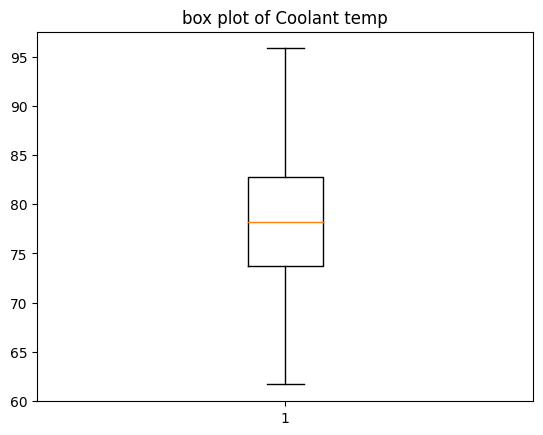

In [ ]:
plt.boxplot(df["Coolant temp"])
plt.title("box plot of Coolant temp")

In [ ]:
df.shape

(14885, 7)

<Axes: >

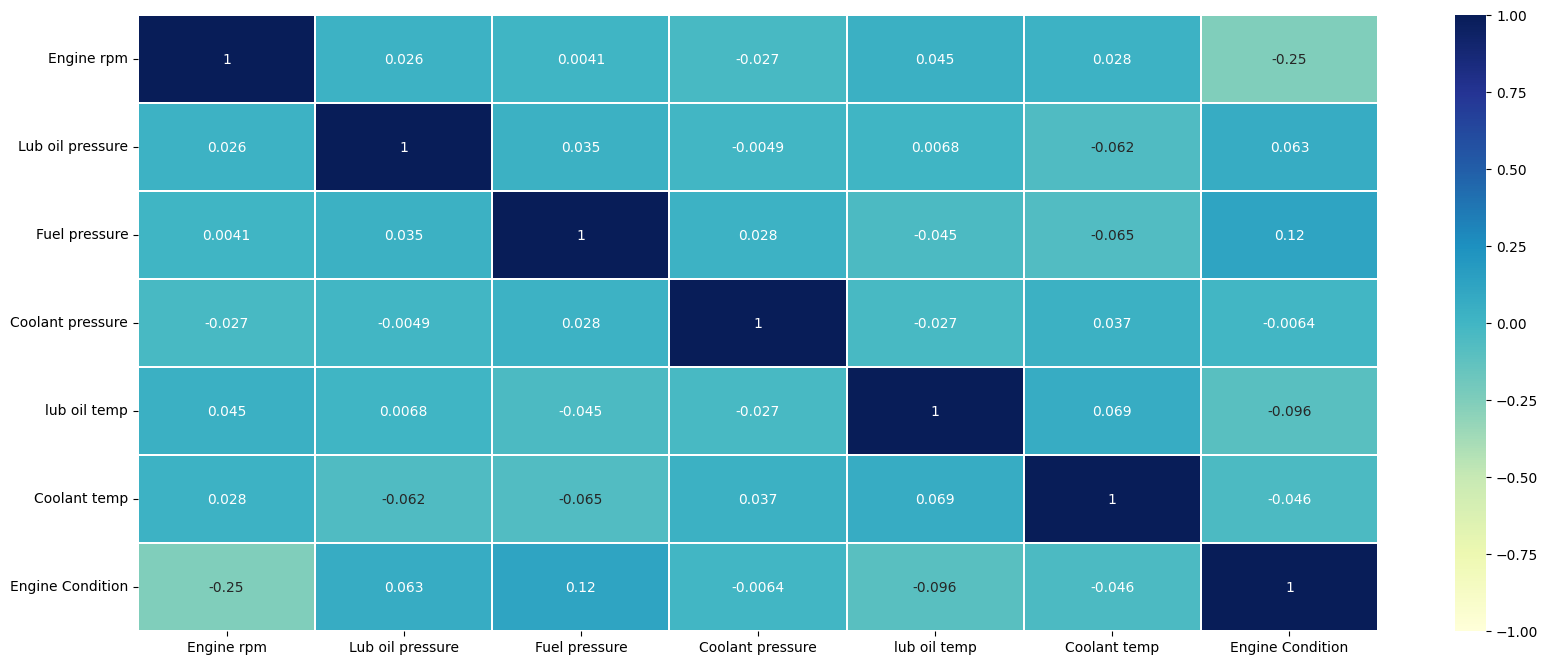

In [ ]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1, vmax=1, annot=True, linewidth=0.2, cmap="YlGnBu")

In [ ]:
x =df.drop(["Engine Condition"],axis="columns")
x.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818
7,729,3.845166,10.191126,2.362998,77.921202,71.671761
8,845,4.877239,3.638269,3.525604,76.301626,70.496024
9,824,3.741228,7.626214,1.301032,77.066520,85.143297


In [ ]:
y =df["Engine Condition"]
y.head()

2    1
5    0
7    1
8    0
9    0
Name: Engine Condition, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
len(x_train)

11163

In [ ]:
len(x_test)

3722

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.669263836646964

In [ ]:
# create KNN (K neigherst Neibour classification)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(x_test,y_test)

0.6351423965609887

In [ ]:
from sklearn.svm import SVC
rbf_model = SVC(kernel="rbf")
rbf_model.fit(x_train,y_train)

SVC()

In [ ]:
rbf_model.score(x_test,y_test)

0.6523374529822676

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rdf.score(x_test,y_test)

0.6560988715744224

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(x_test,y_test)

0.5969908651262762

In [ ]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [ ]:
df["Engine Condition"].unique()

array([1, 0])

In [ ]:

a=float(input("Engine rpm :"))
b=float(input("Lub oil pressure :"))
c=float(input("Fuel pressure :"))
d=float(input("Coolant pressure :"))
e=float(input("lub oil temp :"))
f=float(input("Coolant temp :"))

d_f=pd.DataFrame({"Engine rpm":[a],
                 "Lub oil pressure":[b],
                 "Fuel pressure":[c],
                 "Coolant pressure":[d],
                 "lub oil temp":[e],
                 "Coolant temp":[f]})
d_f

Engine rpm :520
Lub oil pressure :2.9625
Fuel pressure :6.5698
Coolant pressure :1.0687
lub oil temp :77.752144
Coolant temp :79.64852


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,520.0,2.9625,6.5698,1.0687,77.752144,79.64852


In [ ]:
x = rdf.predict(d_f)
if x == 0:
  print("bad condition")
else :
  print("good condition")

good condition


In [ ]:
w =rdf.predict(x_test)
w

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
type(x_test)


pandas.core.frame.DataFrame

In [ ]:
type(d_f)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,w))

              precision    recall  f1-score   support

           0       0.52      0.34      0.41      1307
           1       0.70      0.83      0.76      2415

    accuracy                           0.66      3722
   macro avg       0.61      0.58      0.58      3722
weighted avg       0.63      0.66      0.63      3722

